In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from bayesian.save_bn import save_structure, save_params, read_structure, read_params
from bayesian.train_bn import parameter_learning, component
from sklearn.model_selection import train_test_split
from gmr import GMM
from gmr.utils import check_random_state
from scipy import stats
from sklearn.datasets import make_spd_matrix, make_sparse_spd_matrix
from external.libpgm.hybayesiannetwork import HyBayesianNetwork
from bayesian.calculate_accuracy import calculate_acc, parall_accuracy
import cpuinfo
from scipy import integrate
import math
from scipy.linalg import sqrtm
from mpl_toolkits.mplot3d import Axes3D 
from bayesian.train_bn import structure_learning, parameter_learning, parameter_learning_mix, component, n_component
from preprocess.discretization import get_nodes_type, discretization, inverse_discretization, code_categories, get_nodes_sign
from bayesian.save_bn import save_structure, save_params, read_structure, read_params
from external.libpgm.hybayesiannetwork import HyBayesianNetwork
from bayesian.calculate_accuracy import calculate_acc, LOO_validation, parall_accuracy
from joblib import Parallel, delayed
import cpuinfo
import ipywidgets as widgets
from ipywidgets import interact

In [2]:
rmse_all = [{'C1': 0.037, 'C2': 0.05, 'C3': 0.635},
 {'C1': 0.826, 'C2': 0.033, 'C3': 0.015},
 {'C1': 0.015, 'C2': 0.028, 'C3': 0.817},
 {'C1': 0.019, 'C2': 0.076, 'C3': 0.626},
 {'C1': 0.077, 'C2': 0.015, 'C3': 1.0},
 {'C1': 0.023, 'C2': 0.056, 'C3': 0.999},
 {'C1': 0.008, 'C2': 0.584, 'C3': 0.043},
 {'C1': 0.087, 'C2': 0.025, 'C3': 1.013},
 {'C1': 0.013, 'C2': 0.732, 'C3': 0.025},
 {'C1': 0.023, 'C2': 0.409, 'C3': 0.945},
 {'C1': 0.038, 'C2': 0.056, 'C3': 0.728},
 {'C1': 0.013, 'C2': 0.021, 'C3': 0.998},
 {'C1': 0.47, 'C2': 1.002, 'C3': 0.027},
 {'C1': 0.062, 'C2': 0.818, 'C3': 0.04},
 {'C1': 0.646, 'C2': 0.027, 'C3': 0.064},
 {'C1': 0.823, 'C2': 0.016, 'C3': 0.012},
 {'C1': 0.783, 'C2': 0.019, 'C3': 0.025},
 {'C1': 0.023, 'C2': 0.025, 'C3': 0.835},
 {'C1': 0.025, 'C2': 0.605, 'C3': 0.035},
 {'C1': 1.003, 'C2': 0.032, 'C3': 0.029},
 {'C1': 0.034, 'C2': 0.421, 'C3': 0.87},
 {'C1': 0.475, 'C2': 0.835, 'C3': 0.022},
 {'C1': 0.917, 'C2': 0.056, 'C3': 0.025},
 {'C1': 0.999, 'C2': 0.035, 'C3': 0.01},
 {'C1': 0.015, 'C2': 0.039, 'C3': 0.846},
 {'C1': 0.017, 'C2': 0.023, 'C3': 0.833},
 {'C1': 0.033, 'C2': 0.637, 'C3': 0.014},
 {'C1': 0.654, 'C2': 0.058, 'C3': 0.015},
 {'C1': 0.583, 'C2': 0.05, 'C3': 0.024},
 {'C1': 1.001, 'C2': 0.045, 'C3': 0.038},
 {'C1': 0.034, 'C2': 0.857, 'C3': 0.102},
 {'C1': 0.014, 'C2': 0.026, 'C3': 1.0},
 {'C1': 0.022, 'C2': 0.635, 'C3': 0.018},
 {'C1': 0.096, 'C2': 0.032, 'C3': 0.836},
 {'C1': 0.018, 'C2': 0.03, 'C3': 0.652},
 {'C1': 0.052, 'C2': 0.027, 'C3': 0.787},
 {'C1': 0.637, 'C2': 0.027, 'C3': 0.014},
 {'C1': 0.041, 'C2': 0.023, 'C3': 0.86},
 {'C1': 0.075, 'C2': 0.842, 'C3': 0.031},
 {'C1': 0.017, 'C2': 0.033, 'C3': 0.832},
 {'C1': 0.673, 'C2': 0.032, 'C3': 0.647},
 {'C1': 1.008, 'C2': 0.03, 'C3': 0.108},
 {'C1': 1.006, 'C2': 0.288, 'C3': 0.017},
 {'C1': 0.846, 'C2': 0.079, 'C3': 0.025},
 {'C1': 0.831, 'C2': 0.02, 'C3': 0.011},
 {'C1': 0.014, 'C2': 0.04, 'C3': 0.895},
 {'C1': 0.023, 'C2': 0.039, 'C3': 0.628},
 {'C1': 0.012, 'C2': 0.927, 'C3': 0.364},
 {'C1': 0.01, 'C2': 0.027, 'C3': 0.907},
 {'C1': 0.02, 'C2': 0.999, 'C3': 0.051},
 {'C1': 0.11, 'C2': 0.532, 'C3': 0.045},
 {'C1': 1.0, 'C2': 0.022, 'C3': 0.116},
 {'C1': 0.079, 'C2': 0.838, 'C3': 0.054},
 {'C1': 0.08, 'C2': 1.006, 'C3': 0.017},
 {'C1': 0.852, 'C2': 0.026, 'C3': 0.009},
 {'C1': 0.01, 'C2': 0.031, 'C3': 0.829},
 {'C1': 0.109, 'C2': 0.031, 'C3': 0.622},
 {'C1': 0.044, 'C2': 0.04, 'C3': 1.007},
 {'C1': 0.016, 'C2': 0.757, 'C3': 0.03},
 {'C1': 0.023, 'C2': 1.001, 'C3': 0.015},
 {'C1': 0.022, 'C2': 0.81, 'C3': 0.014},
 {'C1': 0.019, 'C2': 0.083, 'C3': 0.804},
 {'C1': 0.017, 'C2': 0.026, 'C3': 0.555},
 {'C1': 0.81, 'C2': 0.086, 'C3': 0.022},
 {'C1': 0.014, 'C2': 0.025, 'C3': 1.002},
 {'C1': 0.04, 'C2': 0.015, 'C3': 0.84},
 {'C1': 0.354, 'C2': 0.907, 'C3': 0.045},
 {'C1': 0.031, 'C2': 0.053, 'C3': 0.999},
 {'C1': 1.002, 'C2': 0.065, 'C3': 0.013},
 {'C1': 0.036, 'C2': 0.051, 'C3': 0.805},
 {'C1': 0.012, 'C2': 0.025, 'C3': 0.592},
 {'C1': 0.039, 'C2': 0.106, 'C3': 0.835},
 {'C1': 0.893, 'C2': 0.146, 'C3': 0.019},
 {'C1': 0.012, 'C2': 0.084, 'C3': 0.585},
 {'C1': 0.036, 'C2': 0.126, 'C3': 0.72},
 {'C1': 0.066, 'C2': 0.014, 'C3': 0.568},
 {'C1': 1.021, 'C2': 0.008, 'C3': 0.047},
 {'C1': 0.603, 'C2': 0.092, 'C3': 0.01},
 {'C1': 0.048, 'C2': 0.015, 'C3': 0.839},
 {'C1': 0.064, 'C2': 0.628, 'C3': 0.019},
 {'C1': 0.973, 'C2': 0.057, 'C3': 0.017},
 {'C1': 0.883, 'C2': 0.031, 'C3': 0.013},
 {'C1': 0.029, 'C2': 0.038, 'C3': 0.999},
 {'C1': 0.361, 'C2': 0.838, 'C3': 0.025},
 {'C1': 0.031, 'C2': 0.025, 'C3': 1.002},
 {'C1': 0.012, 'C2': 0.014, 'C3': 0.835},
 {'C1': 0.074, 'C2': 0.059, 'C3': 0.665},
 {'C1': 0.018, 'C2': 0.888, 'C3': 0.027},
 {'C1': 0.03, 'C2': 0.024, 'C3': 0.638},
 {'C1': 0.026, 'C2': 0.025, 'C3': 0.776},
 {'C1': 1.003, 'C2': 0.025, 'C3': 0.017},
 {'C1': 0.066, 'C2': 0.622, 'C3': 0.012},
 {'C1': 0.031, 'C2': 0.07, 'C3': 0.824},
 {'C1': 0.022, 'C2': 0.02, 'C3': 0.836},
 {'C1': 0.01, 'C2': 0.083, 'C3': 0.761},
 {'C1': 0.853, 'C2': 0.029, 'C3': 0.037},
 {'C1': 0.124, 'C2': 0.163, 'C3': 0.831},
 {'C1': 0.02, 'C2': 0.089, 'C3': 1.002},
 {'C1': 0.028, 'C2': 0.037, 'C3': 0.823},
 {'C1': 0.015, 'C2': 0.048, 'C3': 0.842}]

In [3]:
rmse_simple = [{'C1': 0.156, 'C2': 0.217, 'C3': 0.735},
 {'C1': 0.873, 'C2': 0.65, 'C3': 0.044},
 {'C1': 0.033, 'C2': 0.811, 'C3': 0.823},
 {'C1': 0.036, 'C2': 0.993, 'C3': 0.684},
 {'C1': 0.862, 'C2': 0.061, 'C3': 0.897},
 {'C1': 1.003, 'C2': 0.086, 'C3': 0.987},
 {'C1': 0.03, 'C2': 0.486, 'C3': 0.66},
 {'C1': 0.277, 'C2': 0.088, 'C3': 1.01},
 {'C1': 0.724, 'C2': 0.807, 'C3': 0.027},
 {'C1': 0.705, 'C2': 0.074, 'C3': 0.352},
 {'C1': 0.769, 'C2': 0.263, 'C3': 0.143},
 {'C1': 0.686, 'C2': 0.102, 'C3': 1.0},
 {'C1': 0.556, 'C2': 1.0, 'C3': 0.618},
 {'C1': 0.148, 'C2': 0.815, 'C3': 0.804},
 {'C1': 0.738, 'C2': 0.826, 'C3': 0.075},
 {'C1': 0.86, 'C2': 0.455, 'C3': 0.066},
 {'C1': 0.1, 'C2': 0.428, 'C3': 0.629},
 {'C1': 0.195, 'C2': 0.127, 'C3': 0.835},
 {'C1': 0.741, 'C2': 0.651, 'C3': 0.062},
 {'C1': 1.002, 'C2': 0.51, 'C3': 0.093},
 {'C1': 0.531, 'C2': 0.594, 'C3': 0.072},
 {'C1': 0.788, 'C2': 0.86, 'C3': 0.295},
 {'C1': 0.848, 'C2': 0.902, 'C3': 0.092},
 {'C1': 0.209, 'C2': 0.085, 'C3': 0.8},
 {'C1': 0.82, 'C2': 0.364, 'C3': 0.078},
 {'C1': 0.831, 'C2': 0.555, 'C3': 0.055},
 {'C1': 0.326, 'C2': 0.062, 'C3': 0.672},
 {'C1': 0.641, 'C2': 0.304, 'C3': 0.241},
 {'C1': 0.254, 'C2': 0.608, 'C3': 0.037},
 {'C1': 0.341, 'C2': 0.094, 'C3': 0.888},
 {'C1': 0.189, 'C2': 0.312, 'C3': 1.006},
 {'C1': 0.038, 'C2': 0.622, 'C3': 1.002},
 {'C1': 0.04, 'C2': 0.652, 'C3': 0.713},
 {'C1': 0.31, 'C2': 0.55, 'C3': 0.354},
 {'C1': 0.71, 'C2': 0.59, 'C3': 0.061},
 {'C1': 0.072, 'C2': 0.566, 'C3': 0.841},
 {'C1': 0.071, 'C2': 0.206, 'C3': 0.857},
 {'C1': 0.044, 'C2': 0.589, 'C3': 0.869},
 {'C1': 0.159, 'C2': 0.232, 'C3': 0.667},
 {'C1': 0.049, 'C2': 0.479, 'C3': 0.842},
 {'C1': 0.667, 'C2': 0.548, 'C3': 0.041},
 {'C1': 1.003, 'C2': 0.608, 'C3': 0.209},
 {'C1': 0.073, 'C2': 0.583, 'C3': 0.854},
 {'C1': 0.848, 'C2': 0.459, 'C3': 0.103},
 {'C1': 0.046, 'C2': 0.447, 'C3': 0.826},
 {'C1': 0.929, 'C2': 0.585, 'C3': 0.058},
 {'C1': 0.668, 'C2': 0.063, 'C3': 0.718},
 {'C1': 0.387, 'C2': 0.075, 'C3': 0.615},
 {'C1': 0.681, 'C2': 0.411, 'C3': 0.039},
 {'C1': 0.655, 'C2': 0.999, 'C3': 0.118},
 {'C1': 0.924, 'C2': 0.042, 'C3': 1.003},
 {'C1': 1.002, 'C2': 0.805, 'C3': 0.072},
 {'C1': 0.454, 'C2': 0.111, 'C3': 0.996},
 {'C1': 0.842, 'C2': 0.955, 'C3': 0.07},
 {'C1': 0.703, 'C2': 0.999, 'C3': 0.023},
 {'C1': 0.499, 'C2': 0.049, 'C3': 0.854},
 {'C1': 0.826, 'C2': 0.698, 'C3': 0.127},
 {'C1': 0.053, 'C2': 0.638, 'C3': 1.014},
 {'C1': 0.083, 'C2': 0.551, 'C3': 1.001},
 {'C1': 0.594, 'C2': 0.06, 'C3': 0.497},
 {'C1': 0.121, 'C2': 0.219, 'C3': 0.838},
 {'C1': 0.144, 'C2': 0.567, 'C3': 0.833},
 {'C1': 1.025, 'C2': 0.038, 'C3': 0.206},
 {'C1': 0.847, 'C2': 0.466, 'C3': 0.095},
 {'C1': 0.867, 'C2': 0.829, 'C3': 0.039},
 {'C1': 0.991, 'C2': 0.832, 'C3': 0.077},
 {'C1': 0.713, 'C2': 0.922, 'C3': 0.074},
 {'C1': 0.247, 'C2': 1.0, 'C3': 0.243},
 {'C1': 0.69, 'C2': 0.121, 'C3': 0.845},
 {'C1': 0.131, 'C2': 1.002, 'C3': 0.332},
 {'C1': 0.092, 'C2': 0.394, 'C3': 0.607},
 {'C1': 0.057, 'C2': 0.831, 'C3': 0.819},
 {'C1': 0.882, 'C2': 0.168, 'C3': 0.514},
 {'C1': 0.137, 'C2': 0.491, 'C3': 0.569},
 {'C1': 0.516, 'C2': 1.003, 'C3': 0.067},
 {'C1': 0.284, 'C2': 0.099, 'C3': 0.715},
 {'C1': 1.008, 'C2': 0.09, 'C3': 0.306},
 {'C1': 0.752, 'C2': 0.332, 'C3': 0.06},
 {'C1': 0.075, 'C2': 0.806, 'C3': 0.654},
 {'C1': 0.085, 'C2': 0.533, 'C3': 0.65},
 {'C1': 0.914, 'C2': 0.837, 'C3': 0.028},
 {'C1': 0.023, 'C2': 0.759, 'C3': 0.871},
 {'C1': 0.046, 'C2': 1.003, 'C3': 0.671},
 {'C1': 0.969, 'C2': 0.809, 'C3': 0.062},
 {'C1': 0.193, 'C2': 0.267, 'C3': 1.002},
 {'C1': 0.585, 'C2': 0.029, 'C3': 0.88},
 {'C1': 0.169, 'C2': 0.23, 'C3': 0.713},
 {'C1': 0.346, 'C2': 0.849, 'C3': 0.046},
 {'C1': 0.046, 'C2': 0.851, 'C3': 0.619},
 {'C1': 0.109, 'C2': 0.246, 'C3': 0.808},
 {'C1': 1.005, 'C2': 0.043, 'C3': 0.834},
 {'C1': 0.112, 'C2': 0.417, 'C3': 0.862},
 {'C1': 0.137, 'C2': 0.601, 'C3': 0.818},
 {'C1': 0.047, 'C2': 0.579, 'C3': 0.826},
 {'C1': 0.087, 'C2': 1.004, 'C3': 0.515},
 {'C1': 0.841, 'C2': 0.043, 'C3': 0.902},
 {'C1': 0.286, 'C2': 0.17, 'C3': 0.873},
 {'C1': 0.115, 'C2': 0.48, 'C3': 1.002},
 {'C1': 0.827, 'C2': 0.053, 'C3': 0.896},
 {'C1': 0.024, 'C2': 0.68, 'C3': 0.882}]

In [4]:
dist_matrix = [[[5.942443719276511, 9772.20534599404, 46356.6761449319], [9772.20534599404, 5.792116843434433, 67055.61215143019], [46356.6761449319, 67055.61215143019, 5.488069353827955]], [[6.422343023073146, 19083.95013935895, 88797.47557285536], [19083.95013935895, 6.047613198176526, 29172.917128273293], [88797.47557285536, 29172.917128273293, 5.7120663696072285]], [[6.125659148272512, 29071.999070585396, 101962.80339934606], [29071.999070585396, 6.067148880992065, 19905.22933431278], [101962.80339934606, 19905.22933431278, 6.1702210699791165]], [[6.201387354657573, 29785.147995397416, 85351.03831924073], [29785.147995397416, 6.546976239918345, 5523.294952563756], [85351.03831924073, 5523.294952563756, 5.896855488474463]], [[6.427706374918489, 754.1395421995909, 23484.662816976634], [754.1395421995909, 5.874265593957857, 14689.49660945415], [23484.662816976634, 14689.49660945415, 6.758244281218452]], [[6.919415858845917, 24138.991743301456, 51776.03513627094], [24138.991743301456, 6.2342410993675, 6549.844568881161], [51776.03513627094, 6549.844568881161, 5.965784100394292]], [[6.892418193992784, 40128.120617482164, 231488.91749616608], [40128.120617482164, 5.9653244632850795, 68567.42943744115], [231488.91749616608, 68567.42943744115, 5.632178027358853]], [[5.252447556927152, 10011.423470175223, 14244.08445504839], [10011.423470175223, 6.054734387962318, 32298.325469040403], [14244.08445504839, 32298.325469040403, 6.151917650642286]], [[5.795105275977729, 10934.455372516084, 29798.453231358297], [10934.455372516084, 6.425065974846126, 40076.50995973249], [29798.453231358297, 40076.50995973249, 5.958920824689102]], [[5.805211255847151, 27544.15437432097, 27391.022908266772], [27544.15437432097, 5.326167578487081, 10746.495494460636], [27391.022908266772, 10746.495494460636, 5.6169437724044275]], [[5.294182795908151, 36744.618421986655, 5801.632158132937], [36744.618421986655, 5.279966389985625, 16110.359388906676], [5801.632158132937, 16110.359388906676, 5.990023568435158]], [[5.474347489759199, 74467.33435969485, 81146.43580976274], [74467.33435969485, 6.755225265033353, 15514.118948451793], [81146.43580976274, 15514.118948451793, 6.433827126619862]], [[5.680716880104643, 12678.603880684403, 10183.759345927587], [12678.603880684403, 7.019353379042345, 7407.511974799165], [10183.759345927587, 7407.511974799165, 6.152341850358799]], [[6.022130605961753, 153594.95635591683, 17114.348806816408], [153594.95635591683, 5.5181013071192595, 59720.3526923865], [17114.348806816408, 59720.3526923865, 5.9146769292630115]], [[6.184519863617045, 24909.122472812407, 39555.79502780683], [24909.122472812407, 5.795729463893096, 5590.9749769664595], [39555.79502780683, 5590.9749769664595, 5.820234660494424]], [[5.5640425583982, 151444.79952201838, 69503.46580100441], [151444.79952201838, 5.629669019919656, 18797.934351196847], [69503.46580100441, 18797.934351196847, 6.2261931361404415]], [[5.827692183039946, 57492.346101393756, 44830.76964334255], [57492.346101393756, 6.673331665359338, 23766.561358153373], [44830.76964334255, 23766.561358153373, 5.725927447340189]], [[5.460389804925974, 140869.57228616774, 67054.76320642416], [140869.57228616774, 6.721396707470937, 26119.76276006998], [67054.76320642416, 26119.76276006998, 5.7453919033014484]], [[5.218541389450931, 37612.38965074856, 22552.057853041893], [37612.38965074856, 6.0109982642804, 10184.446253034761], [22552.057853041893, 10184.446253034761, 4.742634234647907]], [[5.505432554954464, 18206.80552041856, 23367.18150401995], [18206.80552041856, 5.419498470863965, 37201.63218684574], [23367.18150401995, 37201.63218684574, 6.174966363175673]], [[5.9751856453648475, 6870.698317121472, 20524.303698728712], [6870.698317121472, 7.582810502251009, 25228.68971515733], [20524.303698728712, 25228.68971515733, 5.325881730855063]], [[5.169582298247135, 17042.486818330413, 27775.22714600223], [17042.486818330413, 5.2753821587091485, 2916.637253283221], [27775.22714600223, 2916.637253283221, 6.149822323510197]], [[6.2951038721472745, 23699.17652357286, 39254.796364071364], [23699.17652357286, 6.690870028244059, 16851.861237489516], [39254.796364071364, 16851.861237489516, 5.239340802990848]], [[6.351135821700434, 89228.12201454492, 3296.5086912100783], [89228.12201454492, 6.105027931611484, 63199.40550094391], [3296.5086912100783, 63199.40550094391, 6.222520730910507]], [[5.659835416657233, 13586.886547728447, 75782.11627890942], [13586.886547728447, 5.9095863446614345, 10801.235088787156], [75782.11627890942, 10801.235088787156, 5.069550060668222]], [[5.983595592606302, 50306.647355810055, 14017.307807684881], [50306.647355810055, 5.263690343682577, 44346.519719667594], [14017.307807684881, 44346.519719667594, 5.880488984281477]], [[5.808031062628783, 44451.19345910842, 21250.687469097495], [44451.19345910842, 5.755637654672632, 5825.472838982916], [21250.687469097495, 5825.472838982916, 5.62691142511726]], [[5.76042976384276, 21475.216982469203, 77292.78893136774], [21475.216982469203, 6.080788497575749, 108671.40120476627], [77292.78893136774, 108671.40120476627, 5.460311821640117]], [[5.7069790977883, 20781.25594547254, 38382.541607623374], [20781.25594547254, 5.737742093327957, 5812.098977846851], [38382.541607623374, 5812.098977846851, 5.914568524540992]], [[5.457518020321868, 7291.71704770346, 3420.680472994937], [7291.71704770346, 5.468466318745505, 8866.377191041685], [3420.680472994937, 8866.377191041685, 5.940075221583349]], [[5.986853595920751, 17438.43479158641, 8187.657171318013], [17438.43479158641, 5.725641180325031, 5042.835650545992], [8187.657171318013, 5042.835650545992, 5.8461858597648435]], [[6.651545137127052, 53562.26597941943, 36746.50450819431], [53562.26597941943, 6.552052229632258, 12435.362525968143], [36746.50450819431, 12435.362525968143, 5.833125123654988]], [[5.411781254785057, 21741.029221291406, 29733.116614363596], [21741.029221291406, 6.3112325896596095, 40423.182510682826], [29733.116614363596, 40423.182510682826, 5.6515693328877825]], [[6.480791457828263, 13683.298219508437, 23973.25356237676], [13683.298219508437, 5.693395226258453, 48564.29154054885], [23973.25356237676, 48564.29154054885, 6.021983205499809]], [[5.566481248189602, 75732.52957131132, 33679.62177553937], [75732.52957131132, 5.504539732387909, 25762.96416388895], [33679.62177553937, 25762.96416388895, 5.781912462025373]], [[5.031877804684097, 95175.77806120072, 88321.4080285962], [95175.77806120072, 5.7237011407572576, 7354.802069195964], [88321.4080285962, 7354.802069195964, 6.564106410503877]], [[5.88640129839671, 29218.072837292355, 92843.09587427824], [29218.072837292355, 6.001258461215856, 38333.73660652705], [92843.09587427824, 38333.73660652705, 5.127639198022844]], [[6.655280785674915, 70833.30454453792, 10534.033224300036], [70833.30454453792, 6.060396931010331, 28751.37650261416], [10534.033224300036, 28751.37650261416, 6.023890605505537]], [[5.273248830396649, 21052.55044292261, 12481.39938462076], [21052.55044292261, 6.5590602751274805, 6173.941647378105], [12481.39938462076, 6173.941647378105, 5.223528111548339]], [[4.915287717912275, 49760.216966470456, 83863.7743080073], [49760.216966470456, 6.105162586912682, 41816.41007349635], [83863.7743080073, 41816.41007349635, 5.662651111863146]], [[6.545506559312674, 19053.12326342814, 12538.515528466818], [19053.12326342814, 5.416920170821276, 17309.515589193656], [12538.515528466818, 17309.515589193656, 5.601551578163177]], [[6.059191298454538, 6313.113985017235, 14651.072484551049], [6313.113985017235, 6.38901514986523, 2751.431841215917], [14651.072484551049, 2751.431841215917, 6.289295574542414]], [[5.748298458814652, 5083.235142725814, 14739.593654489525], [5083.235142725814, 5.825407247454792, 29489.954724622978], [14739.593654489525, 29489.954724622978, 6.151053781817888]], [[5.162375551575948, 72052.57752462952, 33326.94524849745], [72052.57752462952, 6.122706148744055, 2391.018302471414], [33326.94524849745, 2391.018302471414, 4.847968220389079]], [[6.753415732127206, 5673.32906718335, 81982.83207878594], [5673.32906718335, 6.030940049966321, 83917.12377084825], [81982.83207878594, 83917.12377084825, 7.170955898075475]], [[4.958332642673837, 37415.14916831668, 16374.971415102593], [37415.14916831668, 5.354186456892962, 23405.539786130044], [16374.971415102593, 23405.539786130044, 5.831180352281459]], [[6.026930078770509, 24432.959971158347, 46617.160315713474], [24432.959971158347, 6.30477756592524, 47626.53208354924], [46617.160315713474, 47626.53208354924, 6.432655458235437]], [[5.179126825111558, 41208.31460709297, 12373.906237584679], [41208.31460709297, 6.002897640558211, 15207.585398520245], [12373.906237584679, 15207.585398520245, 6.454216499678356]], [[5.339795770192433, 19379.675261395143, 86089.99138216404], [19379.675261395143, 5.638632166140949, 96368.8527758427], [86089.99138216404, 96368.8527758427, 5.175028062679127]], [[5.815527816814453, 5651.590163820455, 5747.635889309005], [5651.590163820455, 5.698190194108904, 19215.215880506326], [5747.635889309005, 19215.215880506326, 5.933838446365123]], [[6.612810609595483, 37939.617804959256, 116328.18689539218], [37939.617804959256, 4.819293271942413, 801.3633465013165], [116328.18689539218, 801.3633465013165, 5.934155671034595]], [[6.071500691549587, 34174.57160611921, 16889.053434127403], [34174.57160611921, 6.729098299121741, 33688.93235413875], [16889.053434127403, 33688.93235413875, 7.24727478163923]], [[5.971703825272141, 10320.48525332228, 20764.94742745217], [10320.48525332228, 5.427183911695052, 1575.887180324344], [20764.94742745217, 1575.887180324344, 6.476588822094116]], [[6.255526782083636, 67235.2905060503, 4696.148685413935], [67235.2905060503, 5.143575559889365, 55314.02083938747], [4696.148685413935, 55314.02083938747, 6.286600498178239]], [[6.377326920288194, 73914.9127812358, 20249.05997857014], [73914.9127812358, 5.3948055470593275, 146762.17488140264], [20249.05997857014, 146762.17488140264, 5.413832070672817]], [[6.005182102929348, 43678.75708840106, 18720.56453650848], [43678.75708840106, 5.681542725974834, 87235.18821510853], [18720.56453650848, 87235.18821510853, 6.688322385610841]], [[5.6985053188743535, 8671.825223922231, 12543.147237291492], [8671.825223922231, 5.594282336446053, 21292.352367759224], [12543.147237291492, 21292.352367759224, 5.990500387826216]], [[5.261651963512322, 24804.689480525227, 39067.207302955816], [24804.689480525227, 5.328996957826385, 11774.341842222957], [39067.207302955816, 11774.341842222957, 6.346121401526408]], [[4.770334135898513, 47181.29122996839, 60990.98658100375], [47181.29122996839, 5.734184804572928, 18756.20220114558], [60990.98658100375, 18756.20220114558, 5.774390472562592]], [[6.274919314768751, 25155.411794441396, 10909.537468951281], [25155.411794441396, 5.6293450088142425, 57644.1733469818], [10909.537468951281, 57644.1733469818, 5.763677730132475]], [[5.684575377797638, 47066.114882641145, 30764.34581714075], [47066.114882641145, 6.200584381683176, 7712.5534006217285], [30764.34581714075, 7712.5534006217285, 6.024996836937134]], [[6.2178415450298905, 92257.54644079262, 24524.306189690815], [92257.54644079262, 5.880482529541028, 92393.62824277894], [24524.306189690815, 92393.62824277894, 5.158609867955708]], [[6.760172834937078, 1656.83890633872, 92038.1656072647], [1656.83890633872, 6.0435481262276065, 41949.15681031482], [92038.1656072647, 41949.15681031482, 6.450234456945352]], [[5.8391739097197695, 10925.133979710008, 44556.45423194663], [10925.133979710008, 6.1099453219758315, 30157.45287828775], [44556.45423194663, 30157.45287828775, 5.868146976834359]], [[6.0358739402602755, 39204.74081142757, 31993.486560485817], [39204.74081142757, 6.014033264670848, 45669.95345000518], [31993.486560485817, 45669.95345000518, 5.7141792297722525]], [[6.319167002144996, 5092.613873698535, 16405.385024622796], [5092.613873698535, 6.950744670632876, 40129.32899963949], [16405.385024622796, 40129.32899963949, 5.677813052415706]], [[5.927429111036693, 59243.44574018698, 24459.113370240513], [59243.44574018698, 6.278105298324667, 11375.70504130885], [24459.113370240513, 11375.70504130885, 5.821534970251446]], [[5.265912825355283, 6906.909958256779, 28563.583502154015], [6906.909958256779, 6.118026087503416, 19423.93954939386], [28563.583502154015, 19423.93954939386, 6.445286023009909]], [[6.505352915998134, 6496.238939330492, 100363.55134244409], [6496.238939330492, 6.667090798622951, 48876.22884761884], [100363.55134244409, 48876.22884761884, 5.558155398220379]], [[6.453184859299269, 5266.80711841498, 15438.135636413012], [5266.80711841498, 5.468798183928284, 22387.0365674991], [15438.135636413012, 22387.0365674991, 6.070463917914636]], [[6.335143753726235, 31977.61389285191, 203657.17355496352], [31977.61389285191, 5.605478904229012, 217986.5629296383], [203657.17355496352, 217986.5629296383, 5.9752633501498025]], [[5.606087861284404, 22435.207525560185, 18161.68770479679], [22435.207525560185, 6.590590062227234, 9712.996104017488], [18161.68770479679, 9712.996104017488, 6.252381640980116]], [[6.356318886881915, 3862.021230022193, 37816.815953383244], [3862.021230022193, 5.75044837310711, 54431.74540783082], [37816.815953383244, 54431.74540783082, 5.559832280159315]], [[5.806364414650023, 31724.604029309387, 42601.820285248454], [31724.604029309387, 6.034300190045412, 53271.15479248222], [42601.820285248454, 53271.15479248222, 5.734400963443111]], [[5.696839034926961, 41687.45196772681, 7591.675417506195], [41687.45196772681, 5.8375313491312735, 17223.889711705273], [7591.675417506195, 17223.889711705273, 5.4953467173916115]], [[6.364858571652695, 5856.888191329335, 57050.1860068348], [5856.888191329335, 5.7115503098864675, 28366.9690377367], [57050.1860068348, 28366.9690377367, 5.328934096397575]], [[5.296073413566808, 24657.095376092442, 79752.35072364153], [24657.095376092442, 6.275382855363742, 66579.02139193556], [79752.35072364153, 66579.02139193556, 5.422607113380236]], [[6.378587744805242, 132734.06646668402, 744.8751097805485], [132734.06646668402, 6.039603046905328, 122312.1056079242], [744.8751097805485, 122312.1056079242, 4.673691935761826]], [[5.759144313554383, 8958.448398468432, 18296.993757671065], [8958.448398468432, 5.258967832818082, 63961.351313102874], [18296.993757671065, 63961.351313102874, 6.481239039234417]], [[5.527316965820708, 14466.315879034468, 16389.15884269273], [14466.315879034468, 5.761525512956084, 46166.634383754434], [16389.15884269273, 46166.634383754434, 6.129585403292208]], [[6.955430410485255, 18807.25640989404, 62654.2235374863], [18807.25640989404, 5.805520442429176, 73209.36814329922], [62654.2235374863, 73209.36814329922, 5.65387833013933]], [[6.421367627685738, 17262.757265382013, 69061.3690091806], [17262.757265382013, 5.721372782988348, 50194.299662770114], [69061.3690091806, 50194.299662770114, 6.523292259766638]], [[6.085108569508396, 15712.15675263767, 13801.655258122739], [15712.15675263767, 5.430466978595101, 67008.4229217131], [13801.655258122739, 67008.4229217131, 6.184340561996858]], [[5.320400242072162, 75466.57840004445, 10944.389942462783], [75466.57840004445, 6.477084463522239, 25398.72596663089], [10944.389942462783, 25398.72596663089, 5.3106067524767155]], [[5.880405918371014, 16154.460942585061, 3500.984865742683], [16154.460942585061, 6.082542532218743, 24819.77566265023], [3500.984865742683, 24819.77566265023, 6.206331591340079]], [[5.34559065430395, 41698.86861840564, 36356.23522392582], [41698.86861840564, 6.27994703047692, 82988.29890928134], [36356.23522392582, 82988.29890928134, 5.683487462191645]], [[5.46563336634831, 13575.157549312671, 31927.543002872255], [13575.157549312671, 5.927571293544414, 3306.749787013054], [31927.543002872255, 3306.749787013054, 5.506764686958502]], [[5.4451639560401945, 25860.421585792825, 8145.363728835997], [25860.421585792825, 6.592445227842374, 5610.623198569922], [8145.363728835997, 5610.623198569922, 4.893999480399198]], [[5.550071201899893, 28393.63784734942, 29369.694587808666], [28393.63784734942, 5.624835373105739, 16744.797373588], [29369.694587808666, 16744.797373588, 6.229857052841011]], [[5.295098987645079, 5963.331106151813, 7422.047814998783], [5963.331106151813, 5.762161766551899, 13262.50406962591], [7422.047814998783, 13262.50406962591, 6.1629215705241895]], [[6.780250174711698, 18334.450824523617, 25457.529838362287], [18334.450824523617, 6.11043059458524, 33183.27541818771], [25457.529838362287, 33183.27541818771, 6.123706640146545]], [[5.011053407328482, 25979.427346696895, 23619.0738726274], [25979.427346696895, 6.737622163860344, 62050.679393949904], [23619.0738726274, 62050.679393949904, 5.580671587442103]], [[6.5889775358477385, 7229.748722868259, 52108.744431199375], [7229.748722868259, 5.406166434400351, 44981.01852797335], [52108.744431199375, 44981.01852797335, 6.17399733167405]], [[5.852963875547697, 55720.57009346489, 29457.533420477175], [55720.57009346489, 6.441270343340562, 49575.922368395855], [29457.533420477175, 49575.922368395855, 5.739508010353815]], [[6.601218769987004, 60440.55475748577, 9286.536906142268], [60440.55475748577, 6.721200754038693, 77537.45202123612], [9286.536906142268, 77537.45202123612, 5.365358368314379]], [[5.660569888859305, 613849.0051004407, 27534.033301513144], [613849.0051004407, 6.039014120114251, 313046.02780009655], [27534.033301513144, 313046.02780009655, 5.888648713384621]], [[5.302650269181258, 2504.556371812371, 49280.4473489905], [2504.556371812371, 5.130898699620847, 53353.34418668878], [49280.4473489905, 53353.34418668878, 5.365071058994301]], [[5.9683692476206165, 5053.572499041693, 41056.113661528005], [5053.572499041693, 6.5413176443891965, 28588.548392255998], [41056.113661528005, 28588.548392255998, 5.871159931331069]], [[6.398878294161889, 19669.103424286546, 126673.32350280651], [19669.103424286546, 5.996235407912326, 30351.602624735322], [126673.32350280651, 30351.602624735322, 5.673093383331027]], [[5.313269219256421, 72511.38786284663, 10329.356806488597], [72511.38786284663, 5.991793344891324, 73378.02224442639], [10329.356806488597, 73378.02224442639, 5.466088941345432]]]

In [49]:
mean_components_dist = []
for i in range(100):
    matrix = dist_matrix[i]
    mean_components_dist.append((matrix[0][1] + matrix[0][2] + matrix[1][2]) / 3)

In [84]:
model = GMM(n_components=3, priors=[1/3, 1/3, 1/3], means=means[0], covariances=covs[0])
sample = model.sample(100)
model.condition([1, 2],[[-3.99763408e+01, -1.67366488e+01]]).sample(1)

array([[278.22255691]])

In [ ]:
dist_c1 = []
dist_c2 = []
dist_c3 = []
for i in range(100):
    if i in index1:
        m = means[i]
        cov = covs[i]
        sample = GMM(n_components=3, priors=w, means=m, covariances=cov).sample(5000)
        sample = pd.DataFrame(data=sample, columns=['C1', 'C2', 'C3'])
        model1 = GMM(n_components=3).from_samples(sample[['C1', 'C2']].values)
        model2 = GMM(n_components=3).from_samples(sample['C2'].values)
        
        
        

In [50]:
rmse_decrease = []
for i in range(100):
    e1 = rmse_all[i]
    e2 = rmse_simple[i]
    decrease1 = 100 - ((e1['C1'] * 100) / e2['C1'])
    decrease2 = 100 - ((e1['C2'] * 100) / e2['C2'])
    decrease3 = 100 - ((e1['C3'] * 100) / e2['C3'])
    rmse_decrease.append((decrease1 + decrease2 + decrease3) / 3)
    

In [41]:
rmse_all[81]

{'C1': 0.883, 'C2': 0.031, 'C3': 0.013}

In [42]:
rmse_simple[81]

{'C1': 0.023, 'C2': 0.759, 'C3': 0.871}

In [11]:
uniq_structures = []
for s in structures:
    if s not in uniq_structures:
        uniq_structures.append(s)

In [37]:
uniq_structures

[[['C1', 'C3'], ['C2', 'C1'], ['C2', 'C3']],
 [['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']]]

In [55]:
index1 = []
for i, s in enumerate(structures):
    if s == uniq_structures[0]:
        index1.append(i)

In [56]:
index2 = []
for i, s in enumerate(structures):
    if s == uniq_structures[1]:
        index2.append(i)

In [46]:
c1_rmse = []
for ind in index1:
    d = rmse_all[ind]
    sample = GMM(n_components=3, priors=w, means=means[ind], covariances=covs[ind]).sample(1000)
    c1_rmse.append((d['C2']) / np.std(sample[:,0]))

Text(0, 0.5, 'NRMSE Decrease in %')

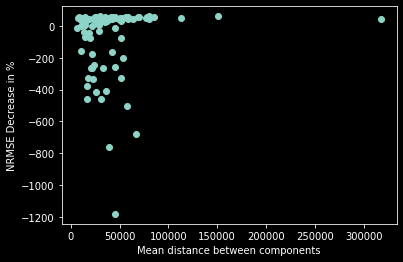

In [52]:
plt.scatter(mean_components_dist, rmse_decrease)
plt.xlabel('Mean distance between components')
plt.ylabel('NRMSE Decrease in %')

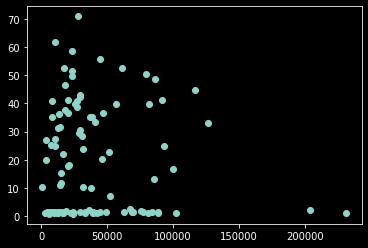

In [14]:
c2_rmse = []
for d in rmse_all:
    c2_rmse.append(d['C2'])
plt.scatter(comp12_dist, c2_rmse)

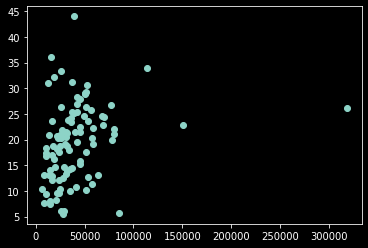

In [15]:
c12_rmse = []
for d in rmse_all:
    c12_rmse.append((d['C1'] + d['C2']) / 2)
plt.scatter(mean_components_dist, c12_rmse)

In [10]:
structures = [[['C1', 'C3'], ['C2', 'C1'], ['C2', 'C3']],
 [['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']],
 [['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']],
 [['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']],
 [['C1', 'C3'], ['C2', 'C1'], ['C2', 'C3']],
 [['C1', 'C3'], ['C2', 'C1'], ['C2', 'C3']],
 [['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']],
 [['C1', 'C3'], ['C2', 'C1'], ['C2', 'C3']],
 [['C1', 'C3'], ['C2', 'C1'], ['C2', 'C3']],
 [['C1', 'C3'], ['C2', 'C1'], ['C2', 'C3']],
 [['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']],
 [['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']],
 [['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']],
 [['C1', 'C3'], ['C2', 'C1'], ['C2', 'C3']],
 [['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']],
 [['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']],
 [['C1', 'C3'], ['C2', 'C1'], ['C2', 'C3']],
 [['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']],
 [['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']],
 [['C1', 'C3'], ['C2', 'C1'], ['C2', 'C3']],
 [['C1', 'C3'], ['C2', 'C1'], ['C2', 'C3']],
 [['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']],
 [['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']],
 [['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']],
 [['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']],
 [['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']],
 [['C1', 'C3'], ['C2', 'C1'], ['C2', 'C3']],
 [['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']],
 [['C1', 'C3'], ['C2', 'C1'], ['C2', 'C3']],
 [['C1', 'C3'], ['C2', 'C1'], ['C2', 'C3']],
 [['C1', 'C3'], ['C2', 'C1'], ['C2', 'C3']],
 [['C1', 'C3'], ['C2', 'C1'], ['C2', 'C3']],
 [['C1', 'C3'], ['C2', 'C1'], ['C2', 'C3']],
 [['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']],
 [['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']],
 [['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']],
 [['C1', 'C3'], ['C2', 'C1'], ['C2', 'C3']],
 [['C1', 'C3'], ['C2', 'C1'], ['C2', 'C3']],
 [['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']],
 [['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']],
 [['C1', 'C3'], ['C2', 'C1'], ['C2', 'C3']],
 [['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']],
 [['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']],
 [['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']],
 [['C1', 'C3'], ['C2', 'C1'], ['C2', 'C3']],
 [['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']],
 [['C1', 'C3'], ['C2', 'C1'], ['C2', 'C3']],
 [['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']],
 [['C1', 'C3'], ['C2', 'C1'], ['C2', 'C3']],
 [['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']],
 [['C1', 'C3'], ['C2', 'C1'], ['C2', 'C3']],
 [['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']],
 [['C1', 'C3'], ['C2', 'C1'], ['C2', 'C3']],
 [['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']],
 [['C1', 'C3'], ['C2', 'C1'], ['C2', 'C3']],
 [['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']],
 [['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']],
 [['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']],
 [['C1', 'C3'], ['C2', 'C1'], ['C2', 'C3']],
 [['C1', 'C3'], ['C2', 'C1'], ['C2', 'C3']],
 [['C1', 'C3'], ['C2', 'C1'], ['C2', 'C3']],
 [['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']],
 [['C1', 'C3'], ['C2', 'C1'], ['C2', 'C3']],
 [['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']],
 [['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']],
 [['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']],
 [['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']],
 [['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']],
 [['C1', 'C3'], ['C2', 'C1'], ['C2', 'C3']],
 [['C1', 'C3'], ['C2', 'C1'], ['C2', 'C3']],
 [['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']],
 [['C1', 'C3'], ['C2', 'C1'], ['C2', 'C3']],
 [['C1', 'C3'], ['C2', 'C1'], ['C2', 'C3']],
 [['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']],
 [['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']],
 [['C1', 'C3'], ['C2', 'C1'], ['C2', 'C3']],
 [['C1', 'C3'], ['C2', 'C1'], ['C2', 'C3']],
 [['C1', 'C3'], ['C2', 'C1'], ['C2', 'C3']],
 [['C1', 'C3'], ['C2', 'C1'], ['C2', 'C3']],
 [['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']],
 [['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']],
 [['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']],
 [['C1', 'C3'], ['C2', 'C1'], ['C2', 'C3']],
 [['C1', 'C3'], ['C2', 'C1'], ['C2', 'C3']],
 [['C1', 'C3'], ['C2', 'C1'], ['C2', 'C3']],
 [['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']],
 [['C1', 'C3'], ['C2', 'C1'], ['C2', 'C3']],
 [['C1', 'C3'], ['C2', 'C1'], ['C2', 'C3']],
 [['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']],
 [['C1', 'C3'], ['C2', 'C1'], ['C2', 'C3']],
 [['C1', 'C3'], ['C2', 'C1'], ['C2', 'C3']],
 [['C1', 'C3'], ['C2', 'C1'], ['C2', 'C3']],
 [['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']],
 [['C1', 'C3'], ['C2', 'C1'], ['C2', 'C3']],
 [['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']],
 [['C1', 'C3'], ['C2', 'C1'], ['C2', 'C3']],
 [['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']],
 [['C1', 'C3'], ['C2', 'C1'], ['C2', 'C3']],
 [['C1', 'C3'], ['C2', 'C1'], ['C2', 'C3']],
 [['C1', 'C2'], ['C1', 'C3'], ['C2', 'C3']]]

In [2]:
means = [[[-21, -2, -13], [7, -52, -34], [-73, -36, 86]], [[30, -47, 55], [10, -95, -43], [-96, 1, -63]], [[-91, 84, -59], [14, 80, 29], [73, 9, 39]], [[-44, 61, 77], [32, 15, -43], [34, 66, -93]], [[1, 72, 47], [-18, 68, 61], [9, -85, 88]], [[-24, -68, -46], [-88, -22, -82], [-81, -21, -24]], [[90, -60, 6], [44, -36, -67], [-98, 43, -91]], [[51, -45, 45], [17, -57, 99], [80, 59, 30]], [[-91, -4, -49], [-12, -75, -48], [46, 72, 10]], [[51, -51, 26], [-74, 70, -1], [-25, 29, 27]], [[-96, -17, 56], [2, -28, -96], [-60, -49, -17]], [[44, 100, -66], [-14, 9, -46], [-32, 72, -76]], [[-3, 40, -12], [75, 36, 24], [96, 36, -40]], [[-84, 85, -90], [-79, -66, -57], [-58, 37, -46]], [[-32, 94, -15], [53, 29, -35], [-6, -14, -13]], [[-71, -26, -40], [54, 99, 83], [25, -66, 48]], [[41, 97, -74], [-18, -90, 4], [-82, -3, -63]], [[-68, -13, -71], [57, 50, 100], [-4, -81, 46]], [[40, -43, 44], [-80, -32, -7], [-25, 44, 36]], [[-71, 17, -30], [-73, -89, -25], [-97, 57, 71]], [[-97, -77, 5], [-71, -90, -52], [-39, 50, 7]], [[-59, -71, 15], [-58, 74, -39], [-60, 90, -74]], [[11, -4, 38], [-25, 40, -36], [82, 22, -20]], [[-75, -47, 66], [-19, -90, -94], [-98, -25, 85]], [[52, -19, 15], [0, -20, 2], [-84, -84, -19]], [[53, 16, -72], [-36, -45, 100], [58, 99, 38]], [[76, 20, 69], [-9, -34, -54], [38, -47, -22]], [[-50, -37, -8], [-80, -29, -78], [92, 14, -77]], [[66, 47, 64], [-14, -42, -1], [-22, -90, -17]], [[-53, -19, 48], [-23, -38, -15], [-75, 39, 56]], [[48, 52, -77], [-38, -44, -95], [-38, 2, -82]], [[-32, 41, -82], [86, -81, -95], [62, -98, -26]], [[92, -9, 26], [20, -61, -75], [28, 99, -17]], [[-81, 30, 70], [-56, -55, 98], [-62, -64, -19]], [[-22, -73, 81], [31, 54, -25], [-68, -48, -64]], [[39, 84, -92], [99, -20, 59], [72, 41, 91]], [[76, -48, -55], [-24, 10, 37], [-60, -88, 82]], [[70, -37, -36], [99, -84, 74], [14, 10, 40]], [[-36, 38, 12], [37, 16, -98], [1, -14, -57]], [[-34, 24, -94], [65, 6, 46], [-96, -85, 77]], [[-10, 48, -65], [51, -68, -65], [-34, -30, 1]], [[44, 2, -56], [56, -78, -41], [24, -99, -55]], [[35, -19, 28], [66, 12, 75], [63, 87, -43]], [[-39, -20, 26], [75, 22, -43], [82, 5, -14]], [[43, 56, 86], [67, -30, 65], [-44, -88, -82]], [[95, 30, 65], [-6, -60, 30], [96, -48, -21]], [[-24, 77, -24], [41, -5, -58], [79, 79, 88]], [[18, 52, -79], [-69, 55, 31], [46, -4, -55]], [[-61, -36, 9], [-45, 45, 84], [93, 100, -87]], [[26, 74, 0], [83, 63, -11], [-2, 31, -58]], [[39, 86, -90], [34, -77, -35], [60, -75, -32]], [[88, -79, -65], [98, 57, 68], [75, 79, -80]], [[13, -39, -3], [10, 1, -58], [-17, 12, -68]], [[59, 24, -46], [-70, 10, 53], [36, 4, -70]], [[69, -25, -29], [-37, -4, 91], [43, -99, -52]], [[35, 12, 48], [-95, -93, 60], [55, -38, -34]], [[-48, -56, -28], [-63, 38, -49], [-31, -21, 49]], [[93, -36, 74], [14, -57, 39], [-9, 25, 7]], [[-69, 96, -47], [46, -2, -48], [-28, -73, -94]], [[-70, 45, 91], [-97, 39, -25], [72, 94, 85]], [[66, -66, -81], [28, -5, 46], [-21, 11, 28]], [[73, -9, 94], [35, -18, -100], [-69, 13, 83]], [[15, -11, -22], [38, 2, -14], [100, 87, 74]], [[46, 26, -72], [65, -4, -3], [-48, 42, -100]], [[-29, 62, 53], [84, 89, 86], [30, -50, 18]], [[53, 32, 4], [90, 82, -22], [79, -57, 15]], [[58, 71, 35], [-50, -8, 34], [-100, 73, -1]], [[48, 9, 3], [-14, 59, 49], [87, 79, 91]], [[-83, 26, 90], [-37, 63, 66], [-26, 61, -95]], [[4, 84, 61], [-61, 62, 99], [1, 100, -31]], [[-55, 96, -82], [98, 54, -98], [-11, -33, 81]], [[5, 75, 39], [-23, -62, 18], [-34, 24, -57]], [[19, 30, -89], [-31, 30, -75], [90, 51, 8]], [[-83, -10, -83], [68, 13, -95], [-58, 29, 81]], [[-59, 76, -77], [2, 62, 76], [-30, 54, -23]], [[-47, 35, -47], [-40, -15, -32], [-83, -81, 78]], [[33, 68, -6], [19, 30, 42], [88, -88, -57]], [[-24, 67, 88], [82, 42, -31], [-9, 56, 89]], [[-41, 0, 43], [2, -56, 23], [-34, 56, -16]], [[83, -44, -34], [56, 80, -38], [69, -93, 59]], [[3, -19, 10], [94, -37, -32], [-52, -82, 60]], [[87, -58, 48], [13, 48, 86], [-63, 55, -33]], [[17, 34, -59], [-65, 99, -65], [83, 12, -8]], [[-21, 92, 2], [-39, -71, 83], [-48, 83, 74]], [[-22, -83, -73], [-42, 1, -18], [26, -75, -53]], [[-89, -86, 52], [-95, 92, -45], [74, -92, 26]], [[80, 35, 85], [56, 13, -13], [69, -30, -70]], [[56, 77, -56], [-76, -44, 2], [-41, 26, 15]], [[-4, 92, -57], [-41, -40, -28], [18, 40, 48]], [[-1, -46, 15], [83, -34, -16], [27, 51, -72]], [[-46, -80, -89], [-97, -99, 22], [-19, -2, 48]], [[-27, -50, 2], [-60, 94, 65], [-62, -93, -97]], [[-1, -63, 70], [38, -86, 44], [-3, -35, -67]], [[-80, 18, 66], [-23, -97, -91], [37, -85, 34]], [[-67, -90, -30], [99, -70, 10], [-77, -52, -93]], [[27, 63, -67], [90, -29, 75], [-51, 69, 14]], [[-1, -16, 61], [-32, -34, 64], [62, -38, -38]], [[-85, 50, 51], [-56, -11, 9], [54, 78, 43]], [[63, 33, -85], [-10, 40, 5], [37, -49, 82]], [[37, 8, 69], [-83, 82, -32], [90, 56, 84]]]


In [3]:
covs = [[np.array([[0.25173424, 0.1672211 , 0.11492512],
       [0.1672211 , 3.31385648, 0.07225958],
       [0.11492512, 0.07225958, 0.37219894]]), np.array([[ 1.7828203 ,  1.41837188, -0.13730094],
       [ 1.41837188,  2.19190353, -0.39976335],
       [-0.13730094, -0.39976335,  0.33851703]]), np.array([[ 3.32887746,  0.17084775, -0.38496733],
       [ 0.17084775,  0.50398617, -0.04434118],
       [-0.38496733, -0.04434118,  0.29555594]])], [np.array([[ 0.46101299, -0.87880371, -0.24057743],
       [-0.87880371,  2.50236818,  0.95963185],
       [-0.24057743,  0.95963185,  0.61692113]]), np.array([[ 1.02891491, -0.87373312, -0.85450133],
       [-0.87373312,  1.71161125,  1.16240856],
       [-0.85450133,  1.16240856,  1.81302753]]), np.array([[ 0.38397444,  0.02582654, -0.14197408],
       [ 0.02582654,  3.34391189, -0.76722949],
       [-0.14197408, -0.76722949,  0.87744971]])], [np.array([[ 2.03714554,  1.34883871, -0.51983875],
       [ 1.34883871,  1.86856328, -0.66934783],
       [-0.51983875, -0.66934783,  0.69536695]]), np.array([[ 2.35760296,  1.37905307, -0.32358214],
       [ 1.37905307,  1.59927475, -0.39681411],
       [-0.32358214, -0.39681411,  0.4748788 ]]), np.array([[0.66920407, 0.63176278, 0.35802516],
       [0.63176278, 2.37165753, 1.30517672],
       [0.35802516, 1.30517672, 0.94086322]])], [np.array([[ 0.50739671, -0.59893734, -0.2466739 ],
       [-0.59893734,  3.32007015,  0.39816875],
       [-0.2466739 ,  0.39816875,  0.64250698]]), np.array([[ 6.47929390e-01, -2.21038500e-01, -1.03960589e-03],
       [-2.21038500e-01,  3.48634900e+00, -5.57217805e-01],
       [-1.03960589e-03, -5.57217805e-01,  6.88401480e-01]]), np.array([[0.91041565, 1.07895753, 0.27455771],
       [1.07895753, 2.97643144, 0.19081771],
       [0.27455771, 0.19081771, 0.45099235]])], [np.array([[ 0.98361635, -0.82549459, -0.55133701],
       [-0.82549459,  1.77088395,  1.3639334 ],
       [-0.55133701,  1.3639334 ,  2.04120614]]), np.array([[ 1.12089938, -0.53980088, -0.77096588],
       [-0.53980088,  2.01224735,  1.33882912],
       [-0.77096588,  1.33882912,  2.26015855]]), np.array([[ 5.78280208e-01, -4.31901283e-01,  2.96873853e-03],
       [-4.31901283e-01,  3.29580118e+00, -5.71030574e-01],
       [ 2.96873853e-03, -5.71030574e-01,  5.17968221e-01]])], [np.array([[0.15175888, 0.0761004 , 0.1476508 ],
       [0.0761004 , 3.24152451, 0.0740487 ],
       [0.1476508 , 0.0740487 , 0.28281457]]), np.array([[ 0.86034427, -0.02648054, -0.02475664],
       [-0.02648054,  1.75885114,  1.66226541],
       [-0.02475664,  1.66226541,  2.16898587]]), np.array([[ 0.68399706,  0.94754665, -0.7456719 ],
       [ 0.94754665,  1.74940199, -1.14666107],
       [-0.7456719 , -1.14666107,  1.3842375 ]])], [np.array([[ 0.60330337, -0.46530504, -0.6323427 ],
       [-0.46530504,  1.72316099,  1.43722906],
       [-0.6323427 ,  1.43722906,  1.62251563]]), np.array([[0.74181211, 0.46497867, 0.08065671],
       [0.46497867, 2.90645638, 1.17518894],
       [0.08065671, 1.17518894, 0.75193286]]), np.array([[ 0.75491526, -0.96748653, -0.68720712],
       [-0.96748653,  2.06853587,  1.08413505],
       [-0.68720712,  1.08413505,  1.14900071]])], [np.array([[ 0.41127434,  0.2803015 , -0.09890344],
       [ 0.2803015 ,  3.10354829,  0.8633925 ],
       [-0.09890344,  0.8633925 ,  0.60223278]]), np.array([[ 0.81517689, -0.30485323,  0.06603743],
       [-0.30485323,  3.5734873 , -0.08844653],
       [ 0.06603743, -0.08844653,  0.34732858]]), np.array([[ 0.73995068, -0.3812969 , -0.70048116],
       [-0.3812969 ,  0.94522365,  0.81573035],
       [-0.70048116,  0.81573035,  3.13726127]])], [np.array([[0.50874041, 0.25752256, 0.12050086],
       [0.25752256, 3.33944788, 0.69817839],
       [0.12050086, 0.69817839, 0.76683222]]), np.array([[ 1.01467492, -1.13721637, -0.2721827 ],
       [-1.13721637,  2.77664219,  0.54401461],
       [-0.2721827 ,  0.54401461,  0.59863673]]), np.array([[2.21729496, 1.40080822, 0.13232858],
       [1.40080822, 1.23287894, 0.13290744],
       [0.13232858, 0.13290744, 0.21065357]])], [np.array([[ 0.62186452, -0.60082045, -0.03588119],
       [-0.60082045,  3.3216358 ,  0.38779881],
       [-0.03588119,  0.38779881,  0.55277008]]), np.array([[ 0.65191749, -0.59885714, -0.13366525],
       [-0.59885714,  3.34779863,  0.65565808],
       [-0.13366525,  0.65565808,  0.89158086]]), np.array([[1.21930395, 1.49362099, 0.17162559],
       [1.49362099, 2.45945472, 0.04913533],
       [0.17162559, 0.04913533, 0.59562699]])], [np.array([[ 3.48242871, -0.04178014, -0.68496728],
       [-0.04178014,  0.44658066, -0.06146873],
       [-0.68496728, -0.06146873,  0.97197445]]), np.array([[ 3.41133029,  0.46752487, -0.50425902],
       [ 0.46752487,  0.76832735, -0.20142008],
       [-0.50425902, -0.20142008,  0.51130923]]), np.array([[ 0.49505112, -0.50246047, -0.43682474],
       [-0.50246047,  1.26950459,  1.07457849],
       [-0.43682474,  1.07457849,  3.01505764]])], [np.array([[ 0.21336619, -0.67215691, -0.18927295],
       [-0.67215691,  2.79852638,  0.63749866],
       [-0.18927295,  0.63749866,  0.3412109 ]]), np.array([[ 0.41463806, -0.15987384, -0.81205837],
       [-0.15987384,  0.61717098,  0.57023594],
       [-0.81205837,  0.57023594,  2.99958704]]), np.array([[ 0.53502872, -0.75854496, -0.40450901],
       [-0.75854496,  2.6057018 ,  0.93960125],
       [-0.40450901,  0.93960125,  0.55921688]])], [np.array([[ 0.83550961, -0.55382799, -0.58891553],
       [-0.55382799,  2.48452145,  1.31748964],
       [-0.58891553,  1.31748964,  1.23694666]]), np.array([[ 2.88593549,  1.15637986, -0.41956221],
       [ 1.15637986,  0.8773746 , -0.34636263],
       [-0.41956221, -0.34636263,  0.69475301]]), np.array([[ 2.17958712,  1.0528895 , -1.00687418],
       [ 1.0528895 ,  1.55831228, -0.81123996],
       [-1.00687418, -0.81123996,  1.06200872]])], [np.array([[ 0.6459718 , -0.67415132, -0.89667737],
       [-0.67415132,  1.60767909,  1.20380916],
       [-0.89667737,  1.20380916,  1.84714442]]), np.array([[ 2.91013306, -0.43009214,  0.63719583],
       [-0.43009214,  0.12388399, -0.08481119],
       [ 0.63719583, -0.08481119,  0.32723682]]), np.array([[ 0.80783272, -0.77582162, -0.58193304],
       [-0.77582162,  2.55191433,  1.09089507],
       [-0.58193304,  1.09089507,  0.84938971]])], [np.array([[ 3.22644614,  0.29758907, -0.57709372],
       [ 0.29758907,  0.22819282,  0.06152741],
       [-0.57709372,  0.06152741,  0.58549956]]), np.array([[ 0.43202507,  0.15250481, -0.02645936],
       [ 0.15250481,  3.32220085,  0.53382359],
       [-0.02645936,  0.53382359,  0.52248886]]), np.array([[ 3.4392448 ,  0.47423489, -0.43259218],
       [ 0.47423489,  0.71061441, -0.21397623],
       [-0.43259218, -0.21397623,  0.5716233 ]])], [np.array([[ 1.25867248,  0.74138367, -1.27957225],
       [ 0.74138367,  1.06566554, -0.89794624],
       [-1.27957225, -0.89794624,  1.64825336]]), np.array([[ 1.44609163,  1.24508857, -0.76358698],
       [ 1.24508857,  2.1489725 , -0.73437605],
       [-0.76358698, -0.73437605,  0.87223496]]), np.array([[ 0.33408006,  0.49962457,  0.11103963],
       [ 0.49962457,  3.31902724, -0.17754141],
       [ 0.11103963, -0.17754141,  0.51151745]])], [np.array([[ 0.33645812, -0.07664616,  0.08548822],
       [-0.07664616,  3.49341893, -0.09406516],
       [ 0.08548822, -0.09406516,  0.60862242]]), np.array([[ 1.2270681 , -0.68298497, -1.0163605 ],
       [-0.68298497,  1.13019577,  1.04324943],
       [-1.0163605 ,  1.04324943,  2.31191619]]), np.array([[ 0.48207408,  0.60291146,  0.12208466],
       [ 0.60291146,  3.36317645, -0.14789144],
       [ 0.12208466, -0.14789144,  0.55267933]])], [np.array([[ 0.47637041,  0.13677523, -0.09099707],
       [ 0.13677523,  3.32932118,  0.33430494],
       [-0.09099707,  0.33430494,  0.24930933]]), np.array([[ 0.62407588,  0.57387245, -0.13110744],
       [ 0.57387245,  3.50397784, -0.28607031],
       [-0.13110744, -0.28607031,  0.77021653]]), np.array([[3.31585126, 0.79927261, 0.32331214],
       [0.79927261, 0.56171168, 0.05096782],
       [0.32331214, 0.05096782, 0.75663773]])], [np.array([[ 1.37085027,  1.39411253, -0.47085704],
       [ 1.39411253,  2.09250534, -0.53530377],
       [-0.47085704, -0.53530377,  0.59138608]]), np.array([[ 0.97022442,  0.67280627, -0.11780482],
       [ 0.67280627,  3.47123455, -0.30009801],
       [-0.11780482, -0.30009801,  0.53584857]]), np.array([[ 3.58984774,  0.39874716, -0.58593304],
       [ 0.39874716,  0.80535855, -0.1066646 ],
       [-0.58593304, -0.1066646 ,  0.91211984]])], [np.array([[ 1.47159573, -1.47511441, -0.49955484],
       [-1.47511441,  2.0375977 ,  0.54122405],
       [-0.49955484,  0.54122405,  0.79840759]]), np.array([[ 2.05882719, -0.14953719, -1.61156397],
       [-0.14953719,  0.74113657,  0.03280489],
       [-1.61156397,  0.03280489,  1.87633785]]), np.array([[ 0.49788027,  0.60026349, -0.2178269 ],
       [ 0.60026349,  3.30125912,  0.11892988],
       [-0.2178269 ,  0.11892988,  0.33964315]])], [np.array([[ 4.61869586e-01, -6.22243443e-01, -2.70388746e-03],
       [-6.22243443e-01,  3.26216900e+00,  2.17566441e-01],
       [-2.70388746e-03,  2.17566441e-01,  4.90216661e-01]]), np.array([[ 2.83900266,  0.77163956, -0.95506961],
       [ 0.77163956,  0.54046784, -0.17023583],
       [-0.95506961, -0.17023583,  0.8838507 ]]), np.array([[ 0.67609383, -0.12921048, -0.19650906],
       [-0.12921048,  2.4826618 ,  1.44923435],
       [-0.19650906,  1.44923435,  1.96326605]])], [np.array([[ 0.83387676,  0.74369808, -0.95418982],
       [ 0.74369808,  1.75476802, -1.20001293],
       [-0.95418982, -1.20001293,  1.54326003]]), np.array([[ 0.66774013,  0.81709425, -0.4403314 ],
       [ 0.81709425,  2.88812533, -0.75973547],
       [-0.4403314 , -0.75973547,  0.63989664]]), np.array([[ 0.88487579,  1.04408554, -0.56845417],
       [ 1.04408554,  2.83644262, -0.74868008],
       [-0.56845417, -0.74868008,  0.99545443]])], [np.array([[ 0.98919399, -1.0898748 , -0.11880738],
       [-1.0898748 ,  2.73076104,  0.70755393],
       [-0.11880738,  0.70755393,  0.38949601]]), np.array([[ 2.70218094,  1.04015972, -0.97066421],
       [ 1.04015972,  1.20967881, -0.48898461],
       [-0.97066421, -0.48898461,  1.2143666 ]]), np.array([[ 0.86166587, -0.82123147, -0.67855122],
       [-0.82123147,  1.54719102,  1.2774661 ],
       [-0.67855122,  1.2774661 ,  2.01736744]])], [np.array([[ 0.89750434,  1.02881625, -0.10633844],
       [ 1.02881625,  2.90944305, -0.01504897],
       [-0.10633844, -0.01504897,  0.16543128]]), np.array([[3.61409054, 0.31021628, 0.54739738],
       [0.31021628, 0.80711804, 0.00618426],
       [0.54739738, 0.00618426, 0.82018591]]), np.array([[ 3.09568245,  0.67142121, -0.85212966],
       [ 0.67142121,  0.41739282, -0.26678994],
       [-0.85212966, -0.26678994,  1.09333237]])], [np.array([[ 0.82105555,  0.87321937, -0.93847007],
       [ 0.87321937,  1.73787002, -1.12067524],
       [-0.93847007, -1.12067524,  1.36487813]]), np.array([[ 1.30691132,  1.48048942, -0.04512097],
       [ 1.48048942,  2.54227952,  0.1024639 ],
       [-0.04512097,  0.1024639 ,  0.66518839]]), np.array([[ 0.56046074,  0.36149114, -0.08453274],
       [ 0.36149114,  3.50320678, -0.65698295],
       [-0.08453274, -0.65698295,  1.01725298]])], [np.array([[ 0.78817889, -0.51456611, -0.68756889],
       [-0.51456611,  2.16842516,  1.35739921],
       [-0.68756889,  1.35739921,  1.82041146]]), np.array([[ 0.67130913, -0.35921597, -0.17036709],
       [-0.35921597,  3.44600091,  0.74312683],
       [-0.17036709,  0.74312683,  0.96942896]]), np.array([[ 0.90765784, -1.12861483,  0.35657301],
       [-1.12861483,  3.1734454 , -0.35460044],
       [ 0.35657301, -0.35460044,  0.94259515]])], [np.array([[ 3.02721222, -0.54822525,  0.84554911],
       [-0.54822525,  0.58608999, -0.07394661],
       [ 0.84554911, -0.07394661,  0.52642736]]), np.array([[ 0.6027501 ,  0.33930258, -0.07902061],
       [ 0.33930258,  3.49765879,  0.08097711],
       [-0.07902061,  0.08097711,  0.49875116]]), np.array([[ 1.82145722, -1.13352932, -0.82861812],
       [-1.13352932,  1.78513914,  0.98448762],
       [-0.82861812,  0.98448762,  1.26360616]])], [np.array([[ 1.08268512, -0.78448884, -0.37629898],
       [-0.78448884,  2.38231761,  1.38982253],
       [-0.37629898,  1.38982253,  1.24259291]]), np.array([[ 0.29860789, -0.07175665, -0.09937451],
       [-0.07175665,  1.81904342,  1.5361969 ],
       [-0.09937451,  1.5361969 ,  1.51743249]]), np.array([[0.33350046, 0.53800144, 0.05024043],
       [0.53800144, 3.1175518 , 0.35397131],
       [0.05024043, 0.35397131, 0.33134886]])], [np.array([[ 0.64384243,  0.57234313,  0.13473101],
       [ 0.57234313,  3.38538619, -0.74111824],
       [ 0.13473101, -0.74111824,  0.86924268]]), np.array([[ 3.24538079,  0.73691621, -0.51155973],
       [ 0.73691621,  0.45961889, -0.12717206],
       [-0.51155973, -0.12717206,  0.79141215]]), np.array([[ 1.87334025, -1.26532395, -0.76911924],
       [-1.26532395,  1.58596573,  0.99803007],
       [-0.76911924,  0.99803007,  1.58964114]])], [np.array([[ 0.42605851,  0.21015331, -0.14081991],
       [ 0.21015331,  3.31546208, -0.78593207],
       [-0.14081991, -0.78593207,  0.90969975]]), np.array([[ 0.91613675, -0.73530081, -0.08493937],
       [-0.73530081,  3.46096073,  0.20631039],
       [-0.08493937,  0.20631039,  0.63917493]]), np.array([[ 0.89388083, -0.15265717, -0.57010451],
       [-0.15265717,  1.02811384,  0.69203929],
       [-0.57010451,  0.69203929,  3.51394084]])], [np.array([[ 2.53778175,  1.21256929, -0.80045016],
       [ 1.21256929,  1.88481313, -0.62129043],
       [-0.80045016, -0.62129043,  1.05227782]]), np.array([[3.23546568, 0.19214385, 0.15171169],
       [0.19214385, 0.32174014, 0.08131261],
       [0.15171169, 0.08131261, 0.19504177]]), np.array([[ 1.72688174,  1.19554042, -0.96947209],
       [ 1.19554042,  1.59838754, -0.69737893],
       [-0.96947209, -0.69737893,  0.84204795]])], [np.array([[ 1.00043746,  0.96674402, -0.74446053],
       [ 0.96674402,  2.02849492, -1.08652651],
       [-0.74446053, -1.08652651,  0.94165356]]), np.array([[0.39724874, 0.12101269, 0.05967858],
       [0.12101269, 3.37522868, 0.24832343],
       [0.05967858, 0.24832343, 0.42624443]]), np.array([[ 0.59401691, -0.47267235,  0.13259835],
       [-0.47267235,  3.39769547, -0.40739769],
       [ 0.13259835, -0.40739769,  0.60948174]])], [np.array([[ 0.90796924, -0.35773268, -0.49059285],
       [-0.35773268,  1.98689138,  1.49808671],
       [-0.49059285,  1.49808671,  2.11781716]]), np.array([[0.47102121, 0.10944758, 0.09863342],
       [0.10944758, 3.28455385, 0.61451549],
       [0.09863342, 0.61451549, 0.48212948]]), np.array([[ 0.5470295 , -0.12563486, -0.1221093 ],
       [-0.12563486,  3.33223793, -0.50957041],
       [-0.1221093 , -0.50957041,  0.19821919]])], [np.array([[ 3.31445667,  0.15268952, -0.50540526],
       [ 0.15268952,  0.50216754,  0.04433803],
       [-0.50540526,  0.04433803,  0.37359667]]), np.array([[ 0.75374336, -0.97079595, -0.24388623],
       [-0.97079595,  2.9228568 ,  0.24033162],
       [-0.24388623,  0.24033162,  0.25327321]]), np.array([[ 0.51356265, -0.10921381,  0.11028966],
       [-0.10921381,  3.49202186,  0.41925243],
       [ 0.11028966,  0.41925243,  0.62977759]])], [np.array([[ 1.06354542, -1.06810808, -0.26299882],
       [-1.06810808,  3.02390378,  0.78700835],
       [-0.26299882,  0.78700835,  1.13216034]]), np.array([[ 0.3756042 ,  0.11512974,  0.05798895],
       [ 0.11512974,  3.24008794, -0.24830372],
       [ 0.05798895, -0.24830372,  0.12881354]]), np.array([[ 1.00227256,  1.27305239, -0.35099666],
       [ 1.27305239,  2.79883834, -0.47993052],
       [-0.35099666, -0.47993052,  0.85806529]])], [np.array([[ 0.68158292, -0.57854974, -0.43799843],
       [-0.57854974,  2.45558499,  1.28522039],
       [-0.43799843,  1.28522039,  1.09432821]]), np.array([[3.36963141, 0.72447178, 0.42484418],
       [0.72447178, 0.8582543 , 0.25977886],
       [0.42484418, 0.25977886, 0.65478826]]), np.array([[2.51161902, 1.450266  , 0.04478996],
       [1.450266  , 1.75903477, 0.16308659],
       [0.04478996, 0.16308659, 0.62574628]])], [np.array([[ 0.6337795 ,  0.68117718, -0.08752878],
       [ 0.68117718,  3.14884824, -0.56215173],
       [-0.08752878, -0.56215173,  0.50327362]]), np.array([[ 0.97206265, -0.92610451, -0.81069364],
       [-0.92610451,  1.75014661,  1.15633921],
       [-0.81069364,  1.15633921,  1.50128577]]), np.array([[ 0.61022781, -0.70215879, -0.68894329],
       [-0.70215879,  1.70648249,  1.31181256],
       [-0.68894329,  1.31181256,  1.38925371]])], [np.array([[3.47732977, 0.17854536, 0.32392005],
       [0.17854536, 0.50587119, 0.20972851],
       [0.32392005, 0.20972851, 0.53362898]]), np.array([[ 2.94284134, -0.7867473 , -0.62344454],
       [-0.7867473 ,  0.70417069,  0.33264746],
       [-0.62344454,  0.33264746,  0.34551756]]), np.array([[ 0.89399184, -0.98589761, -0.47968366],
       [-0.98589761,  2.05570903,  1.28419371],
       [-0.47968366,  1.28419371,  1.78984122]])], [np.array([[ 0.7038202 , -0.54590659, -0.7223386 ],
       [-0.54590659,  1.43120081,  1.13365908],
       [-0.7223386 ,  1.13365908,  2.68681359]]), np.array([[ 0.38608579,  0.30366981,  0.02305321],
       [ 0.30366981,  3.44418461, -0.24230792],
       [ 0.02305321, -0.24230792,  0.62068765]]), np.array([[ 2.98297454,  0.90974475, -0.05722979],
       [ 0.90974475,  0.53437496, -0.07113164],
       [-0.05722979, -0.07113164,  0.33076296]])], [np.array([[ 0.77520302,  1.03034606, -0.05633289],
       [ 1.03034606,  3.26736506, -0.12675598],
       [-0.05633289, -0.12675598,  0.80834871]]), np.array([[ 3.50428003,  0.2902545 , -0.65396883],
       [ 0.2902545 ,  0.82739407, -0.10121006],
       [-0.65396883, -0.10121006,  0.66521836]]), np.array([[ 0.66956315,  0.78099048,  0.19353285],
       [ 0.78099048,  3.25203834, -0.23913165],
       [ 0.19353285, -0.23913165,  0.35054382]])], [np.array([[ 0.40221521, -0.40520797,  0.03751898],
       [-0.40520797,  3.49618205,  0.35371085],
       [ 0.03751898,  0.35371085,  0.79119445]]), np.array([[ 0.97520806, -0.71993099, -1.23195419],
       [-0.71993099,  1.30419263,  0.97679733],
       [-1.23195419,  0.97679733,  1.93086143]]), np.array([[ 0.58554046, -0.18788497,  0.13661587],
       [-0.18788497,  3.64989086,  0.13273508],
       [ 0.13661587,  0.13273508,  0.71331531]])], [np.array([[ 2.63730541, -1.28085561, -0.59798632],
       [-1.28085561,  1.27642151,  0.15706565],
       [-0.59798632,  0.15706565,  0.62002537]]), np.array([[ 0.69332753,  0.54436379, -0.22017608],
       [ 0.54436379,  2.86433935, -1.07446995],
       [-0.22017608, -1.07446995,  0.62614416]]), np.array([[ 1.19396834, -0.79049658, -0.52798325],
       [-0.79049658,  2.33321631,  1.33881881],
       [-0.52798325,  1.33881881,  2.02915889]])], [np.array([[ 2.10477727,  1.32314317, -0.83336824],
       [ 1.32314317,  1.40643256, -0.66699462],
       [-0.83336824, -0.66699462,  1.24322982]]), np.array([[ 1.74521775,  1.3897004 , -0.58132214],
       [ 1.3897004 ,  1.96449819, -0.81171667],
       [-0.58132214, -0.81171667,  1.13382322]]), np.array([[ 0.5793863 ,  0.43300917, -0.03301006],
       [ 0.43300917,  3.08658623, -0.84225711],
       [-0.03301006, -0.84225711,  0.44465303]])], [np.array([[ 1.20951986,  1.549046  , -0.03089633],
       [ 1.549046  ,  2.42012987,  0.07702048],
       [-0.03089633,  0.07702048,  0.65295747]]), np.array([[ 0.3176061 , -0.78664069, -0.14568959],
       [-0.78664069,  3.22651978,  0.10036256],
       [-0.14568959,  0.10036256,  0.58089083]]), np.array([[ 0.80600165,  0.58409356, -0.13125045],
       [ 0.58409356,  3.41791825, -0.22298238],
       [-0.13125045, -0.22298238,  0.41311801]])], [np.array([[ 0.97135069, -0.08654608, -0.09274029],
       [-0.08654608,  2.91855255,  1.42773955],
       [-0.09274029,  1.42773955,  1.96214625]]), np.array([[ 1.60981404,  1.40834568, -0.39014854],
       [ 1.40834568,  2.70113292, -0.37242254],
       [-0.39014854, -0.37242254,  0.94017782]]), np.array([[ 2.68879408,  0.9848194 , -0.50672085],
       [ 0.9848194 ,  0.51696433, -0.15644742],
       [-0.50672085, -0.15644742,  0.28850149]])], [np.array([[ 0.4059063 , -0.02102393, -0.0076656 ],
       [-0.02102393,  3.36488335,  0.2408807 ],
       [-0.0076656 ,  0.2408807 ,  0.38124024]]), np.array([[ 0.97826775, -1.01877576, -0.69864102],
       [-1.01877576,  2.1962191 ,  1.08306005],
       [-0.69864102,  1.08306005,  1.49936757]]), np.array([[ 0.720491  , -0.58830572,  0.08265262],
       [-0.58830572,  3.51327893, -0.04314644],
       [ 0.08265262, -0.04314644,  0.65487955]])], [np.array([[ 0.889903  ,  0.87525582, -0.11536781],
       [ 0.87525582,  3.26408669, -0.09274464],
       [-0.11536781, -0.09274464,  0.49590994]]), np.array([[ 1.04828577,  1.26123204, -0.1000955 ],
       [ 1.26123204,  2.70040774, -0.43119867],
       [-0.1000955 , -0.43119867,  0.55127705]]), np.array([[ 0.84496886,  0.52538836, -0.17874184],
       [ 0.52538836,  3.65531933,  0.11694254],
       [-0.17874184,  0.11694254,  0.69019379]])], [np.array([[ 0.23830798,  0.01523232, -0.01707716],
       [ 0.01523232,  1.48924868,  1.51774358],
       [-0.01707716,  1.51774358,  1.83454271]]), np.array([[ 0.93092705, -0.67318685, -0.72750482],
       [-0.67318685,  2.4093501 ,  1.26174078],
       [-0.72750482,  1.26174078,  1.16340697]]), np.array([[ 1.64083653, -1.57856457, -0.45831912],
       [-1.57856457,  2.09141603,  0.38327879],
       [-0.45831912,  0.38327879,  0.90038227]])], [np.array([[ 0.32652639,  0.24654617, -0.10102681],
       [ 0.24654617,  2.54099393, -1.32775282],
       [-0.10102681, -1.32775282,  1.47467817]]), np.array([[ 1.90607331,  1.37013721, -0.66090056],
       [ 1.37013721,  2.09307956, -0.43459439],
       [-0.66090056, -0.43459439,  0.66358752]]), np.array([[ 0.61920391,  0.09448832,  0.1870111 ],
       [ 0.09448832,  3.54504337, -0.04862038],
       [ 0.1870111 , -0.04862038,  0.40266409]])], [np.array([[ 1.28923916,  0.99057984, -0.60754501],
       [ 0.99057984,  2.37389446, -1.15906661],
       [-0.60754501, -1.15906661,  1.55085681]]), np.array([[ 0.72369091, -0.32997762, -0.77528219],
       [-0.32997762,  1.53616817,  1.36491796],
       [-0.77528219,  1.36491796,  2.20918084]]), np.array([[ 0.75852962, -0.41478459, -0.36697606],
       [-0.41478459,  2.60267612,  1.36228967],
       [-0.36697606,  1.36228967,  1.79032766]])], [np.array([[ 1.05714164, -1.04903876, -0.55032196],
       [-1.04903876,  2.08336043,  1.09168181],
       [-0.55032196,  1.09168181,  0.77102365]]), np.array([[ 0.53853116,  0.36876883,  0.0699806 ],
       [ 0.36876883,  3.26083748, -0.74384152],
       [ 0.0699806 , -0.74384152,  0.62462578]]), np.array([[ 3.18909098,  1.00311773,  0.12722464],
       [ 1.00311773,  0.57082608, -0.08580978],
       [ 0.12722464, -0.08580978,  0.68460907]])], [np.array([[ 0.7850215 , -0.42477322,  0.00619772],
       [-0.42477322,  3.71393726, -0.24135567],
       [ 0.00619772, -0.24135567,  0.87263088]]), np.array([[0.27316097, 0.52741842, 0.0290176 ],
       [0.52741842, 3.19768023, 0.29073647],
       [0.0290176 , 0.29073647, 0.45684606]]), np.array([[ 0.27807631, -0.13523279, -0.43005442],
       [-0.13523279,  0.73106421,  0.4610794 ],
       [-0.43005442,  0.4610794 ,  3.35939193]])], [np.array([[ 1.08072775, -0.79849588, -0.66460524],
       [-0.79849588,  1.8786005 ,  1.35385368],
       [-0.66460524,  1.35385368,  1.53483323]]), np.array([[ 3.35237226, -0.61194425, -0.58219566],
       [-0.61194425,  0.83261252,  0.0359814 ],
       [-0.58219566,  0.0359814 ,  0.57864195]]), np.array([[ 0.57789404, -0.09617423, -0.72071521],
       [-0.09617423,  1.13197077,  1.0808413 ],
       [-0.72071521,  1.0808413 ,  2.88753406]])], [np.array([[ 0.44936477, -0.27630512, -0.1844563 ],
       [-0.27630512,  3.46853137,  0.25335622],
       [-0.1844563 ,  0.25335622,  0.58552902]]), np.array([[ 0.42027502, -0.4310378 ,  0.00777093],
       [-0.4310378 ,  3.17171595,  0.6862523 ],
       [ 0.00777093,  0.6862523 ,  0.58128974]]), np.array([[ 0.47127679, -0.19892044, -0.85737369],
       [-0.19892044,  0.46870441,  0.43635802],
       [-0.85737369,  0.43635802,  2.96394346]])], [np.array([[ 0.20202628, -0.03509743,  0.09082128],
       [-0.03509743,  3.23127719, -0.33556612],
       [ 0.09082128, -0.33556612,  0.3587249 ]]), np.array([[ 3.33289204,  1.05820836,  0.01405932],
       [ 1.05820836,  1.25880352, -0.21001542],
       [ 0.01405932, -0.21001542,  0.67104872]]), np.array([[ 2.45035314,  1.0422301 , -0.70179599],
       [ 1.0422301 ,  0.62936291, -0.36113868],
       [-0.70179599, -0.36113868,  0.35717566]])], [np.array([[ 0.50968251, -0.11373137, -0.11932745],
       [-0.11373137,  3.08851871, -1.03026704],
       [-0.11932745, -1.03026704,  0.81482089]]), np.array([[0.69022001, 0.47522697, 0.35210534],
       [0.47522697, 2.65736212, 1.27643329],
       [0.35210534, 1.27643329, 1.19247228]]), np.array([[ 0.29033901,  0.17597915,  0.06315027],
       [ 0.17597915,  3.45894677, -0.48406001],
       [ 0.06315027, -0.48406001,  0.79813122]])], [np.array([[ 0.87387769,  0.75917603, -0.30630559],
       [ 0.75917603,  3.21489167, -0.62503031],
       [-0.30630559, -0.62503031,  0.68548601]]), np.array([[ 3.51798484,  0.64563886, -0.30720135],
       [ 0.64563886,  0.83248526, -0.11729453],
       [-0.30720135, -0.11729453,  0.74805763]]), np.array([[ 1.0961496 ,  1.11174082, -0.11247122],
       [ 1.11174082,  3.12440595, -0.01937715],
       [-0.11247122, -0.01937715,  0.610153  ]])], [np.array([[ 0.77454075, -0.12501833, -0.22706403],
       [-0.12501833,  3.63270692, -0.1034024 ],
       [-0.22706403, -0.1034024 ,  0.37065008]]), np.array([[ 0.74939301, -0.81952558, -0.49627759],
       [-0.81952558,  2.90405737,  0.80532058],
       [-0.49627759,  0.80532058,  0.70178184]]), np.array([[ 0.88131503,  0.93729813, -0.36326461],
       [ 0.93729813,  2.28361581, -1.22682103],
       [-0.36326461, -1.22682103,  0.92698011]])], [np.array([[ 1.4363861 , -0.74443894, -1.19101599],
       [-0.74443894,  1.28487894,  1.01000998],
       [-1.19101599,  1.01000998,  1.75617015]]), np.array([[ 0.2808993 ,  0.3262311 ,  0.03285037],
       [ 0.3262311 ,  3.33672999, -0.22575332],
       [ 0.03285037, -0.22575332,  0.50908853]]), np.array([[ 1.59372833,  1.4817171 , -0.2396788 ],
       [ 1.4817171 ,  1.84303148, -0.30155197],
       [-0.2396788 , -0.30155197,  0.32791192]])], [np.array([[ 3.16366265,  0.86654908, -0.29282084],
       [ 0.86654908,  0.54497309, -0.00821763],
       [-0.29282084, -0.00821763,  0.59382866]]), np.array([[2.1782355 , 1.48287917, 0.14874057],
       [1.48287917, 2.12789736, 0.43974374],
       [0.14874057, 0.43974374, 0.6954594 ]]), np.array([[ 2.61347039,  0.57090957, -1.36050235],
       [ 0.57090957,  0.94946463, -0.36785782],
       [-1.36050235, -0.36785782,  1.2946246 ]])], [np.array([[ 2.11265544,  1.51528845, -0.2396726 ],
       [ 1.51528845,  2.14900757, -0.40032917],
       [-0.2396726 , -0.40032917,  0.85675369]]), np.array([[ 1.77752258,  1.4861037 , -0.20772683],
       [ 1.4861037 ,  1.91113764, -0.29008671],
       [-0.20772683, -0.29008671,  0.42875865]]), np.array([[ 0.62753523, -0.70508336, -0.39725912],
       [-0.70508336,  2.97954463,  0.81256558],
       [-0.39725912,  0.81256558,  0.73285079]])], [np.array([[ 2.21541693,  1.16771412, -0.88599019],
       [ 1.16771412,  1.46249917, -0.68653841],
       [-0.88599019, -0.68653841,  0.96721784]]), np.array([[ 3.3585607 , -0.74818448,  0.24141762],
       [-0.74818448,  0.9128286 ,  0.11486103],
       [ 0.24141762,  0.11486103,  0.37537586]]), np.array([[ 1.42651782,  1.12718979, -0.48199937],
       [ 1.12718979,  2.63130172, -0.82218447],
       [-0.48199937, -0.82218447,  0.7825891 ]])], [np.array([[ 0.40102861,  0.40965831, -0.30540388],
       [ 0.40965831,  3.39867698, -0.59809533],
       [-0.30540388, -0.59809533,  0.86738704]]), np.array([[ 0.78646106, -0.39048768, -0.55278255],
       [-0.39048768,  2.17875982,  1.42367654],
       [-0.55278255,  1.42367654,  1.99813092]]), np.array([[ 0.84452091, -0.83393116, -1.01979159],
       [-0.83393116,  1.35612166,  1.06111755],
       [-1.01979159,  1.06111755,  1.77085658]])], [np.array([[ 0.09556834,  0.01717761, -0.05119829],
       [ 0.01717761,  3.39905249, -0.21550517],
       [-0.05119829, -0.21550517,  0.59451618]]), np.array([[ 8.04413526e-01, -3.33122320e-01, -1.26614973e-03],
       [-3.33122320e-01,  3.44947914e+00,  8.92001532e-01],
       [-1.26614973e-03,  8.92001532e-01,  1.06675428e+00]]), np.array([[ 1.03698213,  0.6339371 , -0.67405439],
       [ 0.6339371 ,  2.22741977, -1.34288243],
       [-0.67405439, -1.34288243,  1.82807231]])], [np.array([[ 0.78201309, -0.84617916, -0.12598304],
       [-0.84617916,  3.20440155,  0.2783455 ],
       [-0.12598304,  0.2783455 ,  0.51500648]]), np.array([[0.35308625, 0.62815259, 0.05481868],
       [0.62815259, 3.26263823, 0.01914432],
       [0.05481868, 0.01914432, 0.51537826]]), np.array([[ 2.07499994,  1.2633965 , -0.72407794],
       [ 1.2633965 ,  1.11734188, -0.62895753],
       [-0.72407794, -0.62895753,  0.66505116]])], [np.array([[ 0.74699904, -0.22222041, -0.84292767],
       [-0.22222041,  1.12045943,  0.99399119],
       [-0.84292767,  0.99399119,  2.90540226]]), np.array([[ 0.91087892,  1.24139378, -0.25131037],
       [ 1.24139378,  2.30746926, -0.52547071],
       [-0.25131037, -0.52547071,  0.21896903]]), np.array([[ 0.58938866, -0.63239171, -0.47897616],
       [-0.63239171,  2.26269621,  1.28124084],
       [-0.47897616,  1.28124084,  1.00454855]])], [np.array([[ 1.25234718, -1.05348951, -0.72279224],
       [-1.05348951,  1.57052669,  1.21878519],
       [-0.72279224,  1.21878519,  1.60862786]]), np.array([[ 1.17648138, -1.405639  , -0.21168608],
       [-1.405639  ,  2.64189796,  0.296499  ],
       [-0.21168608,  0.296499  ,  0.72934019]]), np.array([[ 3.20713938, -0.62913367,  0.1147674 ],
       [-0.62913367,  0.54721112,  0.04867377],
       [ 0.1147674 ,  0.04867377,  0.28401999]])], [np.array([[ 2.45398023,  1.09995021, -1.07138414],
       [ 1.09995021,  1.49667349, -0.49331545],
       [-1.07138414, -0.49331545,  1.07369604]]), np.array([[ 0.82747524, -0.34714534, -0.12109332],
       [-0.34714534,  3.1348696 ,  1.17466835],
       [-0.12109332,  1.17466835,  1.28157609]]), np.array([[ 1.19311412,  0.86009544, -0.88035574],
       [ 0.86009544,  1.70412039, -1.19995856],
       [-0.88035574, -1.19995856,  1.50839274]])], [np.array([[ 0.91401692, -0.65427898, -0.41056274],
       [-0.65427898,  2.47431172,  1.34236327],
       [-0.41056274,  1.34236327,  1.53071002]]), np.array([[ 1.10457661, -0.82921118, -0.27272439],
       [-0.82921118,  2.98524412,  1.03296581],
       [-0.27272439,  1.03296581,  1.0267597 ]]), np.array([[ 0.35254445, -0.73501503, -0.15737576],
       [-0.73501503,  2.74669595,  1.0303668 ],
       [-0.15737576,  1.0303668 ,  0.95783739]])], [np.array([[2.80214995, 0.9605601 , 1.0173305 ],
       [0.9605601 , 0.81670983, 0.36329455],
       [1.0173305 , 0.36329455, 1.37803814]]), np.array([[ 0.88517984,  0.13177242, -0.80538046],
       [ 0.13177242,  0.86306531, -0.58794009],
       [-0.80538046, -0.58794009,  3.32361146]]), np.array([[ 0.58064944, -0.45159705, -0.35191106],
       [-0.45159705,  2.16361387,  1.43577015],
       [-0.35191106,  1.43577015,  1.42664815]])], [np.array([[ 0.80694504, -0.24802104, -0.25200692],
       [-0.24802104,  2.87791233,  1.33300098],
       [-0.25200692,  1.33300098,  1.26318904]]), np.array([[ 0.82461883,  0.40514535, -0.23174979],
       [ 0.40514535,  3.51952732, -0.42567886],
       [-0.23174979, -0.42567886,  0.49116322]]), np.array([[ 0.40124468, -0.57831703, -0.32458771],
       [-0.57831703,  2.02612616,  1.38743473],
       [-0.32458771,  1.38743473,  1.15551506]])], [np.array([[ 0.76798452, -0.76190767, -0.23499643],
       [-0.76190767,  2.84063843,  0.9940683 ],
       [-0.23499643,  0.9940683 ,  0.8129847 ]]), np.array([[ 0.81476614,  0.84053848, -0.17360205],
       [ 0.84053848,  2.61979819, -1.22513555],
       [-0.17360205, -1.22513555,  1.02017786]]), np.array([[ 0.23645376, -0.17667564,  0.02669126],
       [-0.17667564,  3.40383061,  0.45187963],
       [ 0.02669126,  0.45187963,  0.72774454]])], [np.array([[ 9.15134781e-01,  1.45166632e-01,  1.24543452e-01],
       [ 1.45166632e-01,  3.71405713e+00, -1.97656611e-03],
       [ 1.24543452e-01, -1.97656611e-03,  4.15191231e-01]]), np.array([[ 0.65824172,  0.11867972, -0.14807982],
       [ 0.11867972,  3.49310965, -0.56172461],
       [-0.14807982, -0.56172461,  0.63431704]]), np.array([[ 0.92293377, -0.76237315, -0.79107427],
       [-0.76237315,  1.33918308,  1.33706386],
       [-0.79107427,  1.33706386,  1.51117177]])], [np.array([[0.98917873, 0.07922486, 0.03034328],
       [0.07922486, 2.93329962, 1.43767822],
       [0.03034328, 1.43767822, 1.64572368]]), np.array([[ 1.28846246, -1.29056853, -0.56252037],
       [-1.29056853,  2.67263132,  0.64483651],
       [-0.56252037,  0.64483651,  1.10892237]]), np.array([[ 1.65060198,  1.57102615, -0.22263239],
       [ 1.57102615,  2.05433821,  0.03123516],
       [-0.22263239,  0.03123516,  0.50287703]])], [np.array([[ 1.07140424, -0.36013454, -0.37543943],
       [-0.36013454,  1.6814778 ,  1.63183831],
       [-0.37543943,  1.63183831,  2.24692161]]), np.array([[ 1.20693162,  1.22162014, -0.29659395],
       [ 1.22162014,  3.06717279, -0.38467312],
       [-0.29659395, -0.38467312,  0.93754843]]), np.array([[ 0.94499973,  0.6906958 , -0.55040744],
       [ 0.6906958 ,  2.51509138, -1.26071277],
       [-0.55040744, -1.26071277,  1.33413786]])], [np.array([[ 2.29318375,  0.27814083, -1.45787122],
       [ 0.27814083,  0.49402988, -0.46171748],
       [-1.45787122, -0.46171748,  1.1460597 ]]), np.array([[ 1.02470077, -0.39268098, -0.33166424],
       [-0.39268098,  2.09071882,  1.53304543],
       [-0.33166424,  1.53304543,  2.26756916]]), np.array([[3.33032026, 0.6613071 , 0.11352019],
       [0.6613071 , 0.46180143, 0.00826213],
       [0.11352019, 0.00826213, 0.60790387]])], [np.array([[ 0.37701124, -0.6410519 , -0.53282932],
       [-0.6410519 ,  1.72800011,  1.36087851],
       [-0.53282932,  1.36087851,  1.13595681]]), np.array([[ 1.6809568 ,  0.84478477, -1.06424524],
       [ 0.84478477,  1.27177448, -1.10639071],
       [-1.06424524, -1.10639071,  1.53647424]]), np.array([[ 2.26694009,  1.45628197, -0.32922355],
       [ 1.45628197,  1.55142795, -0.08781605],
       [-0.32922355, -0.08781605,  0.47334675]])], [np.array([[ 0.68527857, -1.05615801, -0.43308083],
       [-1.05615801,  2.56250038,  0.80567682],
       [-0.43308083,  0.80567682,  0.79977331]]), np.array([[ 3.16202844,  0.45321943, -0.41542487],
       [ 0.45321943,  0.4877506 , -0.18734329],
       [-0.41542487, -0.18734329,  0.14271813]]), np.array([[ 1.20711094,  1.1165798 , -0.52643884],
       [ 1.1165798 ,  2.17950101, -1.06431764],
       [-0.52643884, -1.06431764,  1.01112716]])], [np.array([[ 0.90776236, -0.95000749, -0.92861888],
       [-0.95000749,  1.73689902,  1.06861325],
       [-0.92861888,  1.06861325,  1.43722349]]), np.array([[3.08733197, 0.88663795, 0.45613402],
       [0.88663795, 0.54622318, 0.30039157],
       [0.45613402, 0.30039157, 0.66315896]]), np.array([[ 0.71060448, -0.41613184, -0.57041037],
       [-0.41613184,  1.09112337,  1.34015488],
       [-0.57041037,  1.34015488,  2.38150048]])], [np.array([[ 1.2781392 ,  1.0845641 , -0.30903311],
       [ 1.0845641 ,  2.76178288, -0.81466253],
       [-0.30903311, -0.81466253,  0.67970119]]), np.array([[ 0.8854168 , -0.85979008, -0.31864171],
       [-0.85979008,  2.39868116,  1.31796269],
       [-0.31864171,  1.31796269,  1.57401277]]), np.array([[ 0.43648506, -0.84879035, -0.07958795],
       [-0.84879035,  3.15483124, -0.02727802],
       [-0.07958795, -0.02727802,  0.5240832 ]])], [np.array([[ 1.97977571, -1.24496393, -0.83544147],
       [-1.24496393,  0.9592486 ,  0.72446702],
       [-0.83544147,  0.72446702,  0.925496  ]]), np.array([[ 0.63415206, -0.33798565,  0.0885679 ],
       [-0.33798565,  3.45416949, -0.51564033],
       [ 0.0885679 , -0.51564033,  0.67343012]]), np.array([[0.73816927, 0.19382462, 0.18963933],
       [0.19382462, 3.18044088, 0.99845068],
       [0.18963933, 0.99845068, 0.57480877]])], [np.array([[ 0.6702396 , -0.05744664, -0.09158698],
       [-0.05744664,  3.29221475,  0.82609678],
       [-0.09158698,  0.82609678,  0.44459344]]), np.array([[ 0.98569923, -0.49416603, -1.17948047],
       [-0.49416603,  1.01955696,  0.97143085],
       [-1.17948047,  0.97143085,  2.22014845]]), np.array([[ 0.85321328, -0.7786976 , -0.10412214],
       [-0.7786976 ,  3.32091122,  0.32643982],
       [-0.10412214,  0.32643982,  0.57685686]])], [np.array([[ 1.52766133,  1.09757157, -0.61907837],
       [ 1.09757157,  2.65498476, -0.90751151],
       [-0.61907837, -0.90751151,  1.14450173]]), np.array([[ 3.44141037,  0.70459132, -0.15565851],
       [ 0.70459132,  0.72186635,  0.25615377],
       [-0.15565851,  0.25615377,  0.55072612]]), np.array([[ 5.02372373e-01, -8.95438085e-01, -1.05841587e-04],
       [-8.95438085e-01,  3.15730286e+00,  1.36432277e-01],
       [-1.05841587e-04,  1.36432277e-01,  5.77859929e-01]])], [np.array([[ 0.59716956, -0.61528775, -0.37409336],
       [-0.61528775,  2.02718239,  1.3758055 ],
       [-0.37409336,  1.3758055 ,  2.07893759]]), np.array([[ 1.33098563, -0.96424974, -0.70174039],
       [-0.96424974,  1.68937842,  1.29745618],
       [-0.70174039,  1.29745618,  1.65558682]]), np.array([[0.46483426, 0.32524214, 0.22874481],
       [0.32524214, 3.17035395, 0.84449015],
       [0.22874481, 0.84449015, 0.78816812]])], [np.array([[ 0.94206018, -0.31300286, -0.7964431 ],
       [-0.31300286,  0.97992725,  0.99832177],
       [-0.7964431 ,  0.99832177,  2.92174906]]), np.array([[ 0.89292761, -0.51631821,  0.25153807],
       [-0.51631821,  3.03985819, -1.06665872],
       [ 0.25153807, -1.06665872,  0.6142277 ]]), np.array([[ 2.13919515,  1.2716528 , -0.80365372],
       [ 1.2716528 ,  1.44995652, -0.7172451 ],
       [-0.80365372, -0.7172451 ,  1.13698281]])], [np.array([[ 0.91264358, -0.37397592, -0.28582475],
       [-0.37397592,  3.2113366 ,  1.12612328],
       [-0.28582475,  1.12612328,  1.22816058]]), np.array([[ 0.67512493, -0.9201581 , -0.14426516],
       [-0.9201581 ,  3.09592843,  0.60647908],
       [-0.14426516,  0.60647908,  0.80832252]]), np.array([[ 1.14404331,  1.10042902, -0.53853982],
       [ 1.10042902,  2.34860848, -0.99490596],
       [-0.53853982, -0.99490596,  1.06725718]])], [np.array([[ 0.47091961, -0.40258682,  0.05039692],
       [-0.40258682,  3.46073461,  0.39464583],
       [ 0.05039692,  0.39464583,  0.71993577]]), np.array([[ 1.0366273 , -0.6526758 , -0.81144982],
       [-0.6526758 ,  1.66877151,  1.31735102],
       [-0.81144982,  1.31735102,  1.91133388]]), np.array([[0.58329391, 0.38037216, 0.04147452],
       [0.38037216, 3.60020588, 0.23418649],
       [0.04147452, 0.23418649, 0.78932005]])], [np.array([[ 1.57303101,  1.17471317, -0.65033511],
       [ 1.17471317,  2.30139128, -0.98953983],
       [-0.65033511, -0.98953983,  1.38669949]]), np.array([[ 0.61049792, -0.2753754 , -0.36680529],
       [-0.2753754 ,  2.40759192,  1.42856882],
       [-0.36680529,  1.42856882,  1.48172786]]), np.array([[ 2.51794649,  1.30562066, -0.52933727],
       [ 1.30562066,  1.42089281, -0.39801184],
       [-0.52933727, -0.39801184,  0.67204214]])], [np.array([[ 0.35917888,  0.07836312, -0.10802439],
       [ 0.07836312,  2.62474871, -1.27914446],
       [-0.10802439, -1.27914446,  1.02166115]]), np.array([[ 0.82392993, -0.59623401, -0.4616536 ],
       [-0.59623401,  1.8581022 ,  1.48281757],
       [-0.4616536 ,  1.48281757,  1.71421792]]), np.array([[0.75405426, 0.45539884, 0.13572985],
       [0.45539884, 3.43004634, 0.26816931],
       [0.13572985, 0.26816931, 0.33347082]])], [np.array([[ 0.8487089 ,  0.55649895, -0.26660939],
       [ 0.55649895,  2.6870312 , -1.32234713],
       [-0.26660939, -1.32234713,  1.34436458]]), np.array([[ 2.23342312,  0.67131735, -1.26909129],
       [ 0.67131735,  0.81469444, -0.69443117],
       [-1.26909129, -0.69443117,  1.84376838]]), np.array([[ 0.58641214, -0.61261423,  0.0533263 ],
       [-0.61261423,  2.7894671 , -1.22593442],
       [ 0.0533263 , -1.22593442,  1.23485691]])], [np.array([[ 1.02264475, -0.5155399 , -0.62466109],
       [-0.5155399 ,  1.94403718,  1.45809313],
       [-0.62466109,  1.45809313,  1.95824526]]), np.array([[ 2.0774051 , -1.19371954, -0.94951563],
       [-1.19371954,  1.26371488,  0.73486554],
       [-0.94951563,  0.73486554,  1.35235404]]), np.array([[ 0.33045252, -0.25824675, -0.01412516],
       [-0.25824675,  3.48302774, -0.31954271],
       [-0.01412516, -0.31954271,  0.72216179]])], [np.array([[1.08845842, 1.26457456, 0.34077944],
       [1.26457456, 2.63231749, 0.3451451 ],
       [0.34077944, 0.3451451 , 0.49397972]]), np.array([[ 0.88555437, -0.11378797, -0.3072349 ],
       [-0.11378797,  2.65010319,  1.51829689],
       [-0.3072349 ,  1.51829689,  1.42127298]]), np.array([[ 2.7532447 ,  0.86940433, -1.02297398],
       [ 0.86940433,  1.13156318, -0.6657624 ],
       [-1.02297398, -0.6657624 ,  1.15133113]])], [np.array([[ 0.78777632,  0.64841864, -0.15187894],
       [ 0.64841864,  3.43887009, -0.35776697],
       [-0.15187894, -0.35776697,  0.68039256]]), np.array([[0.16780093, 0.14931733, 0.06261764],
       [0.14931733, 3.13427862, 0.75308249],
       [0.06261764, 0.75308249, 0.70316401]]), np.array([[ 0.51482776, -0.25720156,  0.11412092],
       [-0.25720156,  3.00054712,  1.09023483],
       [ 0.11412092,  1.09023483,  0.7504267 ]])], [np.array([[ 3.04881702,  1.02007527, -0.47681482],
       [ 1.02007527,  1.13779296, -0.4775308 ],
       [-0.47681482, -0.4775308 ,  0.54924329]]), np.array([[ 1.03188439, -0.78863003, -0.94476919],
       [-0.78863003,  1.89699362,  1.15667992],
       [-0.94476919,  1.15667992,  1.89598569]]), np.array([[ 0.81410696, -0.26615119, -0.17996426],
       [-0.26615119,  3.26739711,  0.93122164],
       [-0.17996426,  0.93122164,  0.55079265]])], [np.array([[ 0.63644907, -0.78565637, -0.23800525],
       [-0.78565637,  2.69368291,  1.10460686],
       [-0.23800525,  1.10460686,  1.07372271]]), np.array([[ 1.86525364,  0.77047788, -1.23626372],
       [ 0.77047788,  1.39288164, -0.98452172],
       [-1.23626372, -0.98452172,  1.55518561]]), np.array([[ 0.66565423, -0.10666745, -0.15986635],
       [-0.10666745,  3.20422801,  1.10454044],
       [-0.15986635,  1.10454044,  1.22978374]])], [np.array([[ 0.5590474 ,  0.84958879, -0.7206487 ],
       [ 0.84958879,  2.33478018, -1.07850393],
       [-0.7206487 , -1.07850393,  1.10901299]]), np.array([[ 0.81071047,  1.27105381, -0.36941989],
       [ 1.27105381,  2.68496589, -0.21224329],
       [-0.36941989, -0.21224329,  0.43658407]]), np.array([[ 0.62360646,  0.41535603,  0.0588783 ],
       [ 0.41535603,  3.49731999, -0.18981308],
       [ 0.0588783 , -0.18981308,  0.56466348]])], [np.array([[0.52919484, 0.02365382, 0.19293607],
       [0.02365382, 3.40660961, 0.52684072],
       [0.19293607, 0.52684072, 0.45814051]]), np.array([[ 0.4913887 , -0.16867281,  0.02447861],
       [-0.16867281,  3.43260471, -0.11670009],
       [ 0.02447861, -0.11670009,  0.41329859]]), np.array([[1.13878327, 1.33808166, 0.53782903],
       [1.33808166, 2.66204692, 0.47231492],
       [0.53782903, 0.47231492, 0.88957439]])], [np.array([[ 0.95302314, -0.66808846, -0.70743308],
       [-0.66808846,  1.59535863,  1.42611197],
       [-0.70743308,  1.42611197,  1.63270861]]), np.array([[ 3.70742302, -0.11401569, -0.27928924],
       [-0.11401569,  0.6052376 , -0.02836233],
       [-0.27928924, -0.02836233,  0.87104721]]), np.array([[ 0.49163935, -0.42797211,  0.12892079],
       [-0.42797211,  3.38627788, -0.38352769],
       [ 0.12892079, -0.38352769,  0.61417239]])], [np.array([[ 0.59181955,  0.6987976 ,  0.09359209],
       [ 0.6987976 ,  3.34352543, -0.11305399],
       [ 0.09359209, -0.11305399,  0.56268226]]), np.array([[ 1.7614104 ,  1.17145843, -0.77710846],
       [ 1.17145843,  2.33282464, -0.88939966],
       [-0.77710846, -0.88939966,  1.34682603]]), np.array([[0.57251143, 0.27259659, 0.07676687],
       [0.27259659, 3.34656958, 0.27841808],
       [0.07676687, 0.27841808, 0.17940577]])], [np.array([[ 0.24718266, -0.35798355,  0.06952862],
       [-0.35798355,  3.15339217, -0.89546608],
       [ 0.06952862, -0.89546608,  0.99925544]]), np.array([[ 0.97283635,  1.24924548, -0.12696031],
       [ 1.24924548,  2.56465033, -0.60733557],
       [-0.12696031, -0.60733557,  0.50220187]]), np.array([[0.74853871, 0.04672215, 0.08681705],
       [0.04672215, 3.1989665 , 1.14855911],
       [0.08681705, 1.14855911, 1.23493827]])]]

In [4]:
w = [1/3, 1/3, 1/3]
model1 = GMM(n_components=3, priors=w, means=means[81], covariances=covs[81])

sample = model1.sample(5000)
sample = pd.DataFrame(data=sample, columns = ['C1', 'C2', 'C3'])




In [6]:
node_types = {'C1':'cont', 'C2':'cont', 'C3':'cont'}
train,test = train_test_split(sample, test_size=0.07)
train.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)
discrete_data, coder = discretization(train, 'equal_frequency', ['C1', 'C2', 'C3'])
bn_full = structure_learning(discrete_data, 'HC', node_types, 'K2')
params = parameter_learning(train, node_types, bn_full, 'mix')
save_structure(bn_full, 'all_net')
skel = read_structure('all_net')
save_params(params, 'all_net_param')
params = read_params('all_net_param')
all_bn = HyBayesianNetwork(skel, params)
acc, rmse, real, pred, index = parall_accuracy(all_bn, test, ['C1', 'C2', 'C3'], 'mix', 10)

In [59]:
def erf(b):
    func = lambda x: np.exp(-x**2)
    return integrate.quad(func, 0, b)[0]


In [60]:
def weighted_distance(x1, x2, means, cov, w):
    v = x1 - x2
    G_nominator = 0
    G_denominator = 0
    for k in range(len(w)):
        cov_inv = np.linalg.inv(cov[k])
        pi_k = w[k]
        u = np.transpose(means[k] - np.transpose(x2))
        v_t = np.transpose(v)
        u_t = np.transpose(u)
        b2 = np.linalg.inv(np.dot(np.dot(v_t, cov_inv),v))[0][0]
        a = np.dot(np.dot(b2*v_t,cov_inv), u)[0][0]
        m = np.dot(np.dot(v_t, cov_inv), u)
        m2 = np.dot(m,m)
        Z = np.dot(np.dot(u_t,cov_inv), u) - b2*m2
        Z = Z[0][0]
        bound1 = (1 - a) / math.sqrt(2*b2)
        bound2 = -a / math.sqrt(2*b2)
        erf1 = erf(bound1)
        erf2 = erf(bound2)
        diff_erf = erf1 - erf2
        exp_power = np.exp((-1*Z)/2)
        sqrt_b2 = math.sqrt((math.pi*b2)/2)
        integral = sqrt_b2*exp_power*diff_erf
        G_nominator += np.dot(pi_k*cov_inv, integral)
        G_denominator += pi_k*integral
    G = G_nominator/G_denominator
    d = np.dot(np.dot(np.transpose(v), G),v)
    return d[0][0]

In [61]:
def mah_distance(x1, x2, cov):
    v = x1 - x2
    v_t = np.transpose(v)
    cov_inv = np.linalg.inv(cov)
    d = np.dot(np.dot(v_t, cov_inv), v)
    return d[0][0]

In [63]:
dist_matrix = []
means = []
covs = []
w = [1/3, 1/3, 1/3]
for _ in range(1000):
    print(_)
    mean = []
    cov = []
    for k in range(3):
        mean.append([random.randint(-500, 500), random.randint(-500, 500), random.randint(-500, 500)])
        cov.append(make_spd_matrix(3))
    means.append(mean)
    covs.append(cov)
    model = GMM(n_components=3, priors=w, means=mean, covariances=cov)
    sample = model.sample(300)
    sample = pd.DataFrame(data = sample, columns=['C1', 'C2', 'C3'])
    c = []
    for i in model.to_responsibilities(sample):
        c.append(i.argmax())
    sample['comp'] = c
    x1 = sample.loc[sample['comp'] == 0][['C1', 'C2', 'C3']].values
    x2 = sample.loc[sample['comp'] == 1][['C1', 'C2', 'C3']].values
    x3 = sample.loc[sample['comp'] == 2][['C1', 'C2', 'C3']].values
    length = []
    length.append(len(x1))
    length.append(len(x2))
    length.append(len(x3))
    min_len = np.min(length)
    x1 = np.transpose(x1[0:min_len])
    x2 = np.transpose(x2[0:min_len])
    x3 = np.transpose(x3[0:min_len])
    dist_matrix11 = np.empty([min_len, min_len])
    dist_matrix22 = np.empty([min_len, min_len])
    dist_matrix33 = np.empty([min_len, min_len])
    dist_matrix12 = np.empty([min_len, min_len])
    dist_matrix13 = np.empty([min_len, min_len])
    dist_matrix23 = np.empty([min_len, min_len])
    for i in range(min_len):
        for j in range(min_len):
            X1 = np.array([[x1[0][i]], [x1[1][i]], [x1[2][i]]])
            Y1 = np.array([[x1[0][j]], [x1[1][j]],  [x1[2][j]]])
            d = mah_distance(X1, Y1, cov[0])
            dist_matrix11[i][j] = d
            X2 = np.array([[x2[0][i]], [x2[1][i]],  [x2[2][i]]])
            Y2 = np.array([[x2[0][j]], [x2[1][j]], [x2[2][j]]])
            d = mah_distance(X2, Y2, cov[1])
            dist_matrix22[i][j] = d
            X3 = np.array([[x3[0][i]], [x3[1][i]], [x3[2][i]]])
            Y3 = np.array([[x3[0][j]], [x3[1][j]], [x3[2][j]]])
            d = mah_distance(X3, Y3, cov[2])
            dist_matrix33[i][j] = d
            dist_matrix12[i][j] = weighted_distance(X1,Y2,mean, cov, w)
            dist_matrix13[i][j] = weighted_distance(X1, Y3, mean, cov, w)
            dist_matrix23[i][j] = weighted_distance(X2, Y3, mean, cov, w)
    final_dist = [[np.mean(dist_matrix11), np.mean(dist_matrix12), np.mean(dist_matrix13)], [np.mean(dist_matrix12), np.mean(dist_matrix22), np.mean(dist_matrix23)], [np.mean(dist_matrix13), np.mean(dist_matrix23), np.mean(dist_matrix33)]]
    dist_matrix.append(final_dist)

0


KeyboardInterrupt: 

In [31]:
def my_sine(m1, m2, m3, d1, d2, d3):
    """
    Return a sine for x with angular frequeny w and amplitude amp.
    """
    cov = np.array([[[d1]], [[d2]], [[d3]]])
    mean = [[m1], [m2], [m3]]
    w = [1/3, 1/3, 1/3]
    model = GMM(n_components=3, priors=w, means=mean, covariances=cov)
    sample = model.sample(10000)
    sample = pd.DataFrame(data = sample, columns=['C1'])
    c = []
    for i in model.to_responsibilities(sample):
        c.append(i.argmax())
    sample['comp'] = c
    x1 = sample.loc[sample['comp'] == 0]['C1'].values
    x2 = sample.loc[sample['comp'] == 1]['C1'].values
    x3 = sample.loc[sample['comp'] == 2]['C1'].values
    length = []
    length.append(len(x1))
    length.append(len(x2))
    length.append(len(x3))
    min_len = np.min(length)
    x1 = np.transpose(x1[0:min_len])
    x2 = np.transpose(x2[0:min_len])
    x3 = np.transpose(x3[0:min_len])
    dist_matrix11 = np.empty([min_len, min_len])
    dist_matrix22 = np.empty([min_len, min_len])
    dist_matrix33 = np.empty([min_len, min_len])
    dist_matrix12 = np.empty([min_len, min_len])
    dist_matrix13 = np.empty([min_len, min_len])
    dist_matrix23 = np.empty([min_len, min_len])
    for i in range(min_len):
        for j in range(min_len):
            X1 = np.array([[x1[i]]])
            Y1 = np.array([[x1[j]]])
            d = mah_distance(X1, Y1, cov[0])
            dist_matrix11[i][j] = d
            X2 = np.array([[x2[i]]])
            Y2 = np.array([[x2[j]]])
            d = mah_distance(X2, Y2, cov[1])
            dist_matrix22[i][j] = d
            X3 = np.array([[x3[i]]])
            Y3 = np.array([[x3[j]]])
            d = mah_distance(X3, Y3, cov[2])
            dist_matrix33[i][j] = d
            dist_matrix12[i][j] = weighted_distance(X1,Y2,mean, cov, w)
            dist_matrix13[i][j] = weighted_distance(X1, Y3, mean, cov, w)
            dist_matrix23[i][j] = weighted_distance(X2, Y3, mean, cov, w)
    final_dist = [[np.mean(dist_matrix11), np.mean(dist_matrix12), np.mean(dist_matrix13)], [np.mean(dist_matrix12), np.mean(dist_matrix22), np.mean(dist_matrix23)], [np.mean(dist_matrix13), np.mean(dist_matrix23), np.mean(dist_matrix33)]]
    fig, ax = plt.subplots(1,2)
    sns.distplot(sample, ax=ax[0])
    sns.heatmap(final_dist, ax=ax[1])
    plt.show()
   
    #return sample #, final_dist
 
 
# @widgets.interact(m1=(-100, 100, 1), m2=(-100, 100, 1), m3=(-100, 100, 1), d1=(0, 100, 1), d2=(0, 100, 1), d3=(0, 100, 1))
# def update(m1 = 1, m2 = 5, m3 = 50, d1 = 25, d2 = 5, d3 = 50):
#     # """Remove old lines from plot and plot new one"""
#     # [l.remove() for l in ax.lines]

   
#     sns.displot(my_sine(m1, m2, m3, d1, d2, d3))
#     #sns.heatmap(dist)
interact(my_sine, m1=(-100, 100, 1), m2=(-100, 100, 1), m3=(-100, 100, 1), d1=(0, 100, 1), d2=(0, 100, 1), d3=(0, 100, 1))

   



interactive(children=(IntSlider(value=0, description='m1', min=-100), IntSlider(value=0, description='m2', min…

<function __main__.my_sine(m1, m2, m3, d1, d2, d3)>